# Vessel Schedule Recovery Problem (VSRP)

***vsrp.ipynb***

**Author: Jingwen He, August 2025**

Determine the positions of $N$ points in $D$-dimensional space as to minimize the ratio of pairwise distances between points, that is, minimize the ratio of *min* and *max* squared distances.
&copy; Copyright 2025 Fair Isaac Corporation

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.
 
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

This example uses FICO&reg; Xpress software. By running it, you agree to the Community License terms of the [Xpress Shrinkwrap License Agreement](https://community.fico.com/s/contentdocument/06980000002h0i5AAA) with respect to the FICO&reg; Xpress software. See the [licensing options](https://www.fico.com/en/fico-xpress-trial-and-licensing-options) overview for additional details and information about obtaining a paid license.

## Problem Background

### Maritime Transportation Context

Maritime transportation constitutes the backbone of international trade, handling approximately **80% of global trade volume** and **50% of its value**. The sector operates through three distinct modes:

- **Industrial Shipping**: Cargo owners control vessels directly for specific commodities
- **Liner Shipping**: Fixed routes with predetermined, publicly available schedules
- **Tramp Shipping**: Flexible operations without fixed schedules

Among these, **liner shipping** has become dominant for containerized cargo due to its predictability and reliability, essential for modern just-in-time supply chains.

### The Challenge of Schedule Disruptions

Despite rigorous planning, approximately **70-80% of liner voyages encounter delays** at one or multiple ports. Common disruption causes include:

- Adverse weather conditions
- Port congestion and labor strikes
- Mechanical failures
- Geopolitical disturbances
- Unexpected waiting times

## Problem Definition

###  The Vessel Schedule Recovery Problem (VSRP)

The VSRP addresses the operational decision-making process for **determining optimal recovery actions** when vessels face disruptions in liner shipping services. Specifically, the problem involves:

**Given:**
- A vessel (or fleet) operating on a fixed route with predetermined port sequence
- An initial schedule with planned arrival and departure times at each port
- A disruption event causing delay at one or more ports
- Container groups with specific origin-destination requirements and promised delivery times
- Operational constraints (vessel speed limits, port operation capabilities)
- Cost parameters (fuel prices, port charges, penalty rates)

**Determine:**
- Modified vessel route (which ports to visit/skip)
- Sailing speed on each segment
- Port operation duration at each visited port
- Updated arrival and departure times

**Objective:**
- Minimize total weighted cost combining:
  - **Operational costs**: Fuel consumption, port handling charges
  - **Service disruption costs**: Container delay penalties, misconnection penalties, strategy implementation penalties

**Subject to:**
- Vessel must complete the voyage from origin to final destination
- Physical constraints on vessel speed (minimum/maximum)
- Port operation time options (standard/expedited)
- Container transportation requirements
- Time window constraints for schedule recovery

The problem is formulated as a **Mixed-Integer Programming (MIP)** model using a time-space network representation, where nodes represent port-time combinations and edges represent feasible vessel movements. This network structure enables simultaneous optimization of routing, speed, and port operation decisions.

### Recovery Strategy Options

When disruptions occur, operators can employ several recovery strategies:

| Strategy | Description |
|----------|-------------|
| **Speed Adjustment** | Modify vessel sailing speed between ports (increase to recover time or decrease to save fuel) |
| **Port Omission** | Skip one or more scheduled port calls to recover significant time |
| **Expedited Handling** | Reduce port operation time through additional resources |
| **Port Swapping** | Alter the sequence of port calls when geographically feasible |

These strategies can be applied individually or in combination, with the model determining the optimal mix based on the specific disruption scenario and cost-service trade-offs.

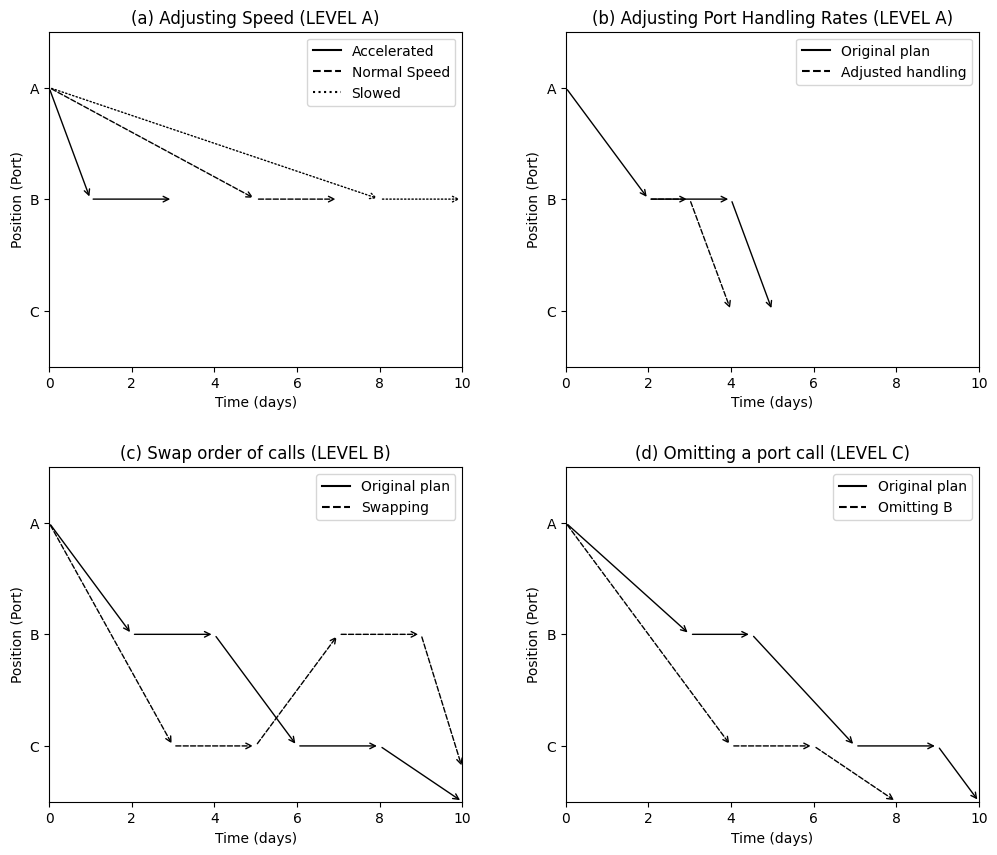

In [14]:
###Recovery strategies illustration###
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Map A, B, C to y-coordinates
pos = {'A': 3, 'B': 2, 'C': 1}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.25)

def setup_ax(ax, title):
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Position (Port)')
    ax.set_yticks([pos['A'], pos['B'], pos['C']])
    ax.set_yticklabels(['A', 'B', 'C'])
    ax.set_xlim(0, 10)
    ax.set_ylim(0.5, 3.5)

# (a) Adjusting Speed 
ax = axes[0, 0]
setup_ax(ax, '(a) Adjusting Speed (LEVEL A)')
# Accelerated: depart 0→arrive B(1), operation→depart B(3)
ax.annotate('', xy=(1, pos['B']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(3, pos['B']), xytext=(1, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
# Normal Speed: depart 0→arrive B(5), operation→depart B(7)
ax.annotate('', xy=(5, pos['B']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(7, pos['B']), xytext=(5, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='--'))
# Slowed: depart 0→arrive B(8), operation→depart B(9)
ax.annotate('', xy=(8, pos['B']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle=':'))
ax.annotate('', xy=(10, pos['B']), xytext=(8, pos['B']), arrowprops=dict(arrowstyle='->', linestyle=':'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Accelerated'),
    Line2D([], [], color='black', linestyle='--', label='Normal Speed'),
    Line2D([], [], color='black', linestyle=':', label='Slowed')
], loc='upper right')

# (b) Adjusting Port Handling Rates 
ax = axes[0, 1]
setup_ax(ax, '(b) Adjusting Port Handling Rates (LEVEL A)')
ax.annotate('', xy=(2, pos['B']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(4, pos['B']), xytext=(2, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(5, pos['C']), xytext=(4, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(3, pos['B']), xytext=(2, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(4, pos['C']), xytext=(3, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Original plan'),
    Line2D([], [], color='black', linestyle='--', label='Adjusted handling')
], loc='upper right')

# (c) Omitting a port call 
ax = axes[1, 1]
setup_ax(ax, '(d) Omitting a port call (LEVEL C)')
ax.annotate('', xy=(3, pos['B']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(4.5, pos['B']), xytext=(3, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(7, pos['C']), xytext=(4.5, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(9, pos['C']), xytext=(7, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(10, 0.5), xytext=(9, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(4, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(6, pos['C']), xytext=(4, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(8, 0.5), xytext=(6, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Original plan'),
    Line2D([], [], color='black', linestyle='--', label='Omitting B')
], loc='upper right')

# (d) Swap order of calls 
ax = axes[1, 0]
setup_ax(ax, '(c) Swap order of calls (LEVEL B)')
ax.annotate('', xy=(2, pos['B']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(4, pos['B']), xytext=(2, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(6, pos['C']), xytext=(4, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(8, pos['C']), xytext=(6, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(10, 0.5), xytext=(8, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(3, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(5, pos['C']), xytext=(3, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(7, pos['B']), xytext=(5, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(9, pos['B']), xytext=(7, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.annotate('', xy=(10, 0.8), xytext=(9, pos['B']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Original plan'),
    Line2D([], [], color='black', linestyle='--', label='Swapping')
], loc='upper right')

plt.show()

# Mathematical Model Formulation

## Notation

### Sets
- $V$: Set of vessels
- $P$: Set of ports
- $H_v$: Ordered set of planned port calls for vessel $v$
- $T$: Set of discrete time slots within the recovery horizon
- $C$: Set of container groups
- $E_s$: Set of all feasible sailing edges in the time-space network
- $L_h$: Set of possible sailing edges that cover port call $h \in H_v$
- $N_v$: Set of all nodes in the time-space network for vessel $v$, including a source node $n_s^v$ and a sink node $n_t^v$
- $n^+$: Set of outgoing edges from node $n$
- $n^-$: Set of incoming edges to node $n$
- $D_h$: Set of optional durations for port call $h \in H_v$, $D_h = \{D_s, D_e\}$, where $D_s$ = standard duration, $D_e$ = expedited duration
- $S_{types}$: Set of recovery strategy types, $S_{types} = \{A1, A2, B, C\}$, where A1 = speed up, A2 = expedited portcall, B = swap, C = omission

### Parameters
- $c_e^v$: Operating cost for vessel $v$ traversing edge $e \in E_s$
- $c_c^m$: Penalty for misconnection of container group $c \in C$
- $c_c^d$: Penalty for delay of container group $c \in C$
- $c_d^{port}$: Additional port operation cost for duration option $d \in D_h$
- $O_e^c$: Binary parameter, 1 if container group $c$ is delayed when arriving by edge $e$; 0 otherwise
- $M_e^c$: Set of non-connecting edges for container group $c$ if edge $e$ is sailed
- $F_n^v$: Flow constant for vessel $v$ at node $n$

$$F_n^v = \begin{cases}
-1, & n = n_s^v \\
1, & n = n_t^v \\
0, & \text{otherwise}
\end{cases}$$

- $B_c, I_c, T_c$: Sets of port calls for container group $c$'s origin, intermediate, and destination ports
- $t_e$: Travel time for edge $e$
- $\tau_d$: Actual duration for port call option $d \in D_h$
- $P_s^{strategy}$: Penalty associated with strategy type $s \in S_{types}$
- $\alpha$: Adjustable parameter $\alpha \in [0, 1]$ balancing service disruption and operational costs
- $\rho_{e,d}$: Indicator parameter, 1 if traversing edge $e$ with duration $d$ constitutes port reordering; 0 otherwise
- $\gamma_{e,d}$: Indicator parameter, 1 if traversing edge $e$ with duration $d$ constitutes speed up; 0 otherwise
- $\phi_c$: Promised arrival time of container group $c$ at termination port

### Decision Variables
- $x_{e,d}$: Binary variable, 1 if vessel traverses edge $e$ with port call duration $d$; 0 otherwise
- $w_{h,d}$: Binary variable, 1 if port call $h$ is performed with duration option $d$; 0 otherwise
- $b_{v,h,s}$: Binary variable, 1 if strategy type $s$ is applied for port call $h$ of vessel $v$; 0 otherwise
- $o_c$: Binary variable, 1 if container group $c$ experiences delay; 0 otherwise
- $y_c$: Binary variable, 1 if container group $c$ experiences misconnection; 0 otherwise

## Model Formulation

### Objective Function

Minimize: 

$$\alpha \cdot \left[\sum_{c \in C}[c_c^m y_c + c_c^d o_c] + \sum_{v \in V}\sum_{h \in H_v}\sum_{s \in S_{types}} P_s^{strategy} \cdot b_{v,h,s}\right] + (1-\alpha) \cdot \left[\sum_{v \in V}\sum_{h \in H_v}\sum_{e \in L_h}\sum_{d \in D_h}(c_e^v + c_d^{port})x_{e,d}\right] \quad (1)$$

### Constraints

Port Call and Flow Conservation Constraints

$$\sum_{e \in L_h}\sum_{d \in D_h} x_{e,d} + b_{v,h,omission} = 1 \quad \forall v \in V, h \in H_v \quad (2)$$

$$\sum_{e \in n^+}\sum_{d \in D_{target(e)}} x_{e,d} - \sum_{e \in n^-}\sum_{d \in D_{target(e)}} x_{e,d} = F_n^v \quad \forall v \in V, n \in N_v \quad (3)$$

$$\sum_{d \in D_h} w_{h,d} = 1 \quad \forall v \in V, h \in H_v \text{ if visited} \quad (4)$$

$$w_{h,d} = \sum_{e \in L_h} x_{e,d} \quad \forall v \in V, h \in H_v, d \in D_h \quad (5)$$

Strategy Classification Constraints

$$b_{v,h,speed\_up} = \sum_{e \in L_h}\sum_{d \in D_h} x_{e,d} \gamma_{e,d} \quad \forall v \in V, h \in H_v \quad (6)$$

$$b_{v,h,expedited\_portcall} = \sum_{d \in D_h \atop d \text{ expedited}} w_{h,d} \quad \forall v \in V, h \in H_v \quad (7)$$

$$b_{v,h,reorder} = \sum_{e \in L_h}\sum_{d \in D_h} x_{e,d} \rho_{e,d} \quad \forall v \in V, h \in H_v \quad (8)$$

Container Group Delay and Misconnection Constraints

$$y_c \leq o_c \quad \forall c \in C \quad (9)$$

$$\sum_{e \in L_{T_c}} O_e^c \sum_{d \in D_{T_c}} x_{e,d} \leq o_c \quad \forall c \in C \quad (10)$$

$$b_{v,h,omission} \leq y_c \quad \forall c \in C, h \in B_c \cup I_c \cup T_c \quad (11)$$

$$x_{e,d} + \sum_{i \in M_e^c} x_{i,d'} \leq 1 + y_c \quad \forall c \in C, e \in \{L_h|h \in B_c \cup I_c \cup T_c\} \quad (12)$$

Variable Domain Constraints

$$x_{e,d} \in \{0, 1\} \quad \forall e \in E_s, d \in D_h \quad (13)$$

$$w_{h,d} \in \{0, 1\} \quad \forall v \in V, h \in H_v, d \in D_h \quad (14)$$

$$b_{v,h,s} \in \{0, 1\} \quad \forall v \in V, h \in H_v, s \in S_{types} \quad (15)$$

$$y_c, o_c \in \{0, 1\} \quad \forall c \in C \quad (16)$$


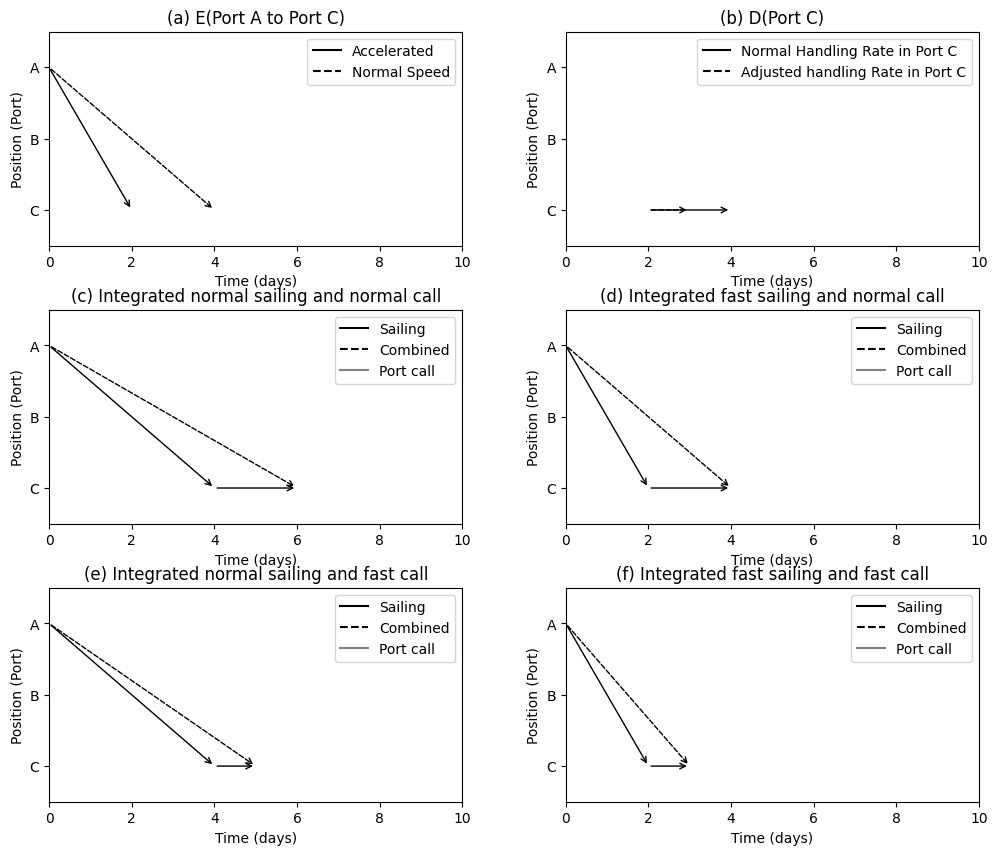

In [15]:
###Illustration of possible sailing speeds and port call durations###
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


pos = {'A': 3, 'B': 2, 'C': 1}

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.25)

def setup_ax(ax, title):
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Position (Port)')
    ax.set_yticks([pos['A'], pos['B'], pos['C']])
    ax.set_yticklabels(['A', 'B', 'C'])
    ax.set_xlim(0, 10)
    ax.set_ylim(0.5, 3.5)

# (a) Adjusting Speed 
ax = axes[0, 0]
setup_ax(ax, '(a) E(Port A to Port C)')
# Accelerated: 
ax.annotate('', xy=(2, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
# Normal Speed: 
ax.annotate('', xy=(4, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Accelerated'),
    Line2D([], [], color='black', linestyle='--', label='Normal Speed'),

], loc='upper right')

# (b) Adjusting Port Handling Rates 
ax = axes[0, 1]
setup_ax(ax, '(b) D(Port C)')
ax.annotate('', xy=(4, pos['C']), xytext=(2, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(3, pos['C']), xytext=(2, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Normal Handling Rate in Port C'),
    Line2D([], [], color='black', linestyle='--', label='Adjusted handling Rate in Port C')
], loc='upper right')

# (c) Omitting a port call 
ax = axes[1, 0]
setup_ax(ax, '(c) Integrated normal sailing and normal call')
ax.annotate('', xy=(4, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(6, pos['C']), xytext=(4, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(6, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Sailing'),
    Line2D([], [], color='black', linestyle='--', label='Combined'),
    Line2D([], [], color='grey', linestyle='-', label='Port call')
], loc='upper right')

# (d) Swap order of calls 
ax = axes[1, 1]
setup_ax(ax, '(d) Integrated fast sailing and normal call')
ax.annotate('', xy=(2, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(4, pos['C']), xytext=(2, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(4, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Sailing'),
    Line2D([], [], color='black', linestyle='--', label='Combined'),
    Line2D([], [], color='grey', linestyle='-', label='Port call')
], loc='upper right')

ax = axes[2, 0]
setup_ax(ax, '(e) Integrated normal sailing and fast call')
ax.annotate('', xy=(4, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(5, pos['C']), xytext=(4, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(5, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Sailing'),
    Line2D([], [], color='black', linestyle='--', label='Combined'),
    Line2D([], [], color='grey', linestyle='-', label='Port call')
], loc='upper right')

ax = axes[2, 1]
setup_ax(ax, '(f) Integrated fast sailing and fast call')
ax.annotate('', xy=(2, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(3, pos['C']), xytext=(2, pos['C']), arrowprops=dict(arrowstyle='->', linestyle='-'))
ax.annotate('', xy=(3, pos['C']), xytext=(0, pos['A']), arrowprops=dict(arrowstyle='->', linestyle='--'))
ax.legend(handles=[
    Line2D([], [], color='black', linestyle='-', label='Sailing'),
    Line2D([], [], color='black', linestyle='--', label='Combined'),
    Line2D([], [], color='grey', linestyle='-', label='Port call')
], loc='upper right')


plt.show()


# Numerical studies

## Implementation Notes

For the numerical implementation of this model, the following specifications were adopted:

### Parameter Values
- **Speed levels**: SLOW (15 knots), NORMAL (20 knots), FAST (25 knots)
- **Port durations**: $\tau_{standard} = 24$ hours, $\tau_{expedited} = 12$ hours
- **Port costs**: $c_{standard}^{port} = \$5,000$, $c_{expedited}^{port} = \$15,000$
- **Container penalties**: $c_c^d = \$200$/hour, $c_c^m = \$1,000$
- **Strategy penalties**: $P_{A1}^{strategy} = \$1,000$, $P_{A2}^{strategy} = \$2,000$, $P_C^{strategy} = \$25,000$
- **Fuel model**: $f(v) = 0.005 \cdot v^3$ tonnes/day, with fuel price = $600/tonne

- **Trade-off parameter**: $\alpha = 0.5$ 

### Model Simplifications
1. **Port Swapping (Level B) Strategy**: Constraint (8) and the corresponding strategy were not implemented in the code, as port swapping is rarely utilized in practice and significantly complicates the model structure.

2. **Transshipment Misconnection Logic**: Constraint (12) for complex multi-vessel transshipments was excluded to focus on the core recovery strategies.


This decision prevents over-complication of the model by excluding less frequently utilized recovery strategies. However, our current implementation is still robust and comprehensive, as it models all of the common logics and critical recovery strategies.

## Baseline Case: a trans-Pacific container shipping route
A voyage under consideration includes ten port calls based on a realistic trans-Pacific container shipping route (based on http://www.maerskline.com). The vessel originates from the Port of Kwangyang (KWY) and follows a planned sequence through several Asian and North American ports before returning. The case study analyzes a disruption scenario where the vessel encounters an initial delay of 48 hours at the start of its voyage. The complete planned route is: Kwangyang (KWY) → Busan (BUS) → Qingdao (QIN) → Nagoya (NAG) → Yokohama (YOK1) → Long Beach (LGB) → Oakland (OAK) → Dutch Harbor (DHB) → Yokohama (YOK2) → Kwangyang (KWY2). The distances for all pairs of ports are shown in table belolw.
| | **1** | **2** | **3** | **4** | **5** | **6** | **7** | **8** | **9** | **10** |
|---|---|---|---|---|---|---|---|---|---|---|
| **1 Kwangyang** | 0 | 103 | 421 | 724 | 837 | 5377 | 5061 | 3044 | 837 | 0 |
| **2 Busan** | 103 | 0 | 476 | 699 | 813 | 5294 | 4978 | 2961 | 813 | 103 |
| **3 Qingdao** | 421 | 476 | 0 | 1029 | 1143 | 5748 | 5431 | 3414 | 1143 | 421 |
| **4 Nagoya** | 724 | 699 | 1029 | 0 | 205 | 4977 | 4674 | 2692 | 205 | 724 |
| **5 Yokohama** | 837 | 813 | 1143 | 205 | 0 | 4844 | 4536 | 2550 | 0 | 837 |
| **6 Long Beach** | 5377 | 5294 | 5748 | 4977 | 4844 | 0 | 364 | 2404 | 4844 | 5377 |
| **7 Oakland** | 5061 | 4978 | 5431 | 4674 | 4536 | 364 | 0 | 2062 | 4536 | 5061 |
| **8 Dutch Harbor** | 3044 | 2961 | 3414 | 2692 | 2550 | 2404 | 2062 | 0 | 2550 | 3044 |
| **9 Yokohama** | 837 | 813 | 1143 | 205 | 0 | 4844 | 4536 | 2550 | 0 | 837 |
| **10 Kwangyang** | 0 | 103 | 421 | 724 | 837 | 5377 | 5061 | 3044 | 837 | 0 |

In [16]:
"""
Baseline Case: a trans-Pacific container shipping route
Complete VSRP Implementation 
"""

import xpress as xp
import numpy as np
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional, Set
from enum import Enum

# ============================================================================
# PART 1: MODEL DEFINITION
# ============================================================================

class SpeedLevel(Enum):
    """Discrete speed levels for vessels"""
    SLOW = 1     # 15 knots
    NORMAL = 2   # 20 knots
    FAST = 3     # 25 knots

class PortDuration(Enum):
    """Port operation duration options"""
    STANDARD = 1   # Standard operation (24 hours)
    EXPEDITED = 2  # Expedited operation (12 hours)

class RecoveryStrategy(Enum):
    """Recovery strategy types with hierarchical penalties"""
    SPEED_UP = 1         # Level A1: Speed increase
    EXPEDITED_PORT = 2   # Level A2: Expedited port handling
    PORT_SWAP = 3        # Level B: Port swapping
    PORT_OMISSION = 4    # Level C: Port omission

@dataclass(frozen=True, eq=True)
class Edge:
    """Edge in the time-space network"""
    from_port: int
    to_port: int
    speed: SpeedLevel
    travel_time: float
    fuel_cost: float
    covers_port: int
    is_swap: bool = False
    is_omission: bool = False
    
    def __hash__(self):
        return hash((self.from_port, self.to_port, self.speed.value, 
                    self.is_swap, self.is_omission))

@dataclass
class ContainerGroup:
    """Container group with transportation requirements"""
    id: str
    origin: int
    destination: int
    transshipment_ports: List[int]
    quantity: int
    promised_arrival: float
    delay_penalty: float
    misconnection_penalty: float

class ImprovedVSRPModel:
    """
    Improved VSRP optimization model with corrected delay logic
    """
    
    def __init__(self):
        """Initialize the model with default parameters"""
        self.model = xp.problem("ImprovedVSRP")
        
        # Speed values (knots)
        self.speed_values = {
            SpeedLevel.SLOW: 15.0,
            SpeedLevel.NORMAL: 20.0,
            SpeedLevel.FAST: 25.0
        }
        
        # Fuel consumption parameters
        self.fuel_price = 600.0
        self.fuel_beta = 3.0
        self.fuel_k = 0.005
        
        # Port operation durations (hours)
        self.port_durations = {
            PortDuration.STANDARD: 24.0,
            PortDuration.EXPEDITED: 12.0
        }
        
        # Port operation costs (USD)
        self.port_costs = {
            PortDuration.STANDARD: 5000.0,
            PortDuration.EXPEDITED: 15000.0
        }
        
        # Strategy penalties (USD)
        self.strategy_penalties = {
            RecoveryStrategy.SPEED_UP: 1000.0,
            RecoveryStrategy.EXPEDITED_PORT: 2000.0,
            RecoveryStrategy.PORT_SWAP: 10000.0,
            RecoveryStrategy.PORT_OMISSION: 25000.0
        }
        
        self.alpha = 0.5
        self.time_horizon = 800
        
        # Decision variables
        self.x = {}
        self.w = {}
        self.b = {}
        self.o = {}
        self.y = {}
        self.t_arr = {}
        self.t_dep = {}
        
        self.O_e_c = {}
        
    def build_model(self, 
                    ports: List[str],
                    distances: Dict[Tuple[str, str], float],
                    containers: List[ContainerGroup],
                    initial_delay: float = 0,
                    original_schedule: Dict[str, float] = None):
        """Build the complete VSRP model"""
        
        self.ports = ports
        self.n_ports = len(ports)
        self.distances = distances
        self.containers = containers
        self.initial_delay = initial_delay
        self.original_schedule = original_schedule or self._calculate_original_schedule()
        
        print(f"\nBuilding Improved VSRP Model:")
        print(f"  - Number of ports: {self.n_ports}")
        print(f"  - Container groups: {len(containers)}")
        print(f"  - Initial delay: {initial_delay} hours")
        
        self.edges = self._build_time_space_network()
        print(f"  - Network edges: {len(self.edges)}")
        
        self._precompute_delay_parameters()
        self._create_variables()
        self._create_objective()
        self._create_constraints()
        
        print("Model building completed\n")
        
    def _calculate_original_schedule(self) -> Dict[str, float]:
        """Calculate the original planned schedule"""
        schedule = {}
        current_time = 0
        
        for i, port in enumerate(self.ports):
            schedule[port] = current_time
            if i < len(self.ports) - 1:
                next_port = self.ports[i + 1]
                if (port, next_port) in self.distances:
                    distance = self.distances[(port, next_port)]
                    travel_time = distance / self.speed_values[SpeedLevel.NORMAL]
                    current_time += travel_time + self.port_durations[PortDuration.STANDARD]
        
        return schedule
    
    def _build_time_space_network(self) -> List[Edge]:
        """Build the time-space network"""
        edges = []
        
        for i in range(self.n_ports):
            # Normal sequence edges
            if i < self.n_ports - 1:
                for speed in SpeedLevel:
                    if edge := self._create_edge(i, i+1, speed, False, False):
                        edges.append(edge)
            
            # Port omission edges
            if i < self.n_ports - 2:
                for speed in SpeedLevel:
                    if edge := self._create_edge(i, i+2, speed, False, True):
                        edges.append(edge)
        
        return list(set(edges))
    
    def _create_edge(self, from_port: int, to_port: int, 
                     speed: SpeedLevel, is_swap: bool, is_omission: bool) -> Optional[Edge]:
        """Create an edge with travel time and fuel cost"""
        from_name = self.ports[from_port]
        to_name = self.ports[to_port]
        
        if (from_name, to_name) in self.distances:
            distance = self.distances[(from_name, to_name)]
            speed_value = self.speed_values[speed]
            travel_time = distance / speed_value
            
            daily_consumption = self.fuel_k * (speed_value ** self.fuel_beta)
            travel_days = travel_time / 24.0
            fuel_cost = daily_consumption * travel_days * self.fuel_price
            
            return Edge(
                from_port=from_port,
                to_port=to_port,
                speed=speed,
                travel_time=travel_time,
                fuel_cost=fuel_cost,
                covers_port=to_port,
                is_swap=is_swap,
                is_omission=is_omission
            )
        return None
    
    def _precompute_delay_parameters(self):
        """Pre-compute O_e_c parameters"""
        print("  Pre-computing delay parameters...")
        
        for edge in self.edges:
            for container in self.containers:
                if edge.to_port == container.destination:
                    estimated_arrival = self._estimate_arrival_time(edge)
                    if estimated_arrival > container.promised_arrival:
                        self.O_e_c[(edge, container.id)] = 1
                    else:
                        self.O_e_c[(edge, container.id)] = 0
    
    def _estimate_arrival_time(self, edge: Edge) -> float:
        """Estimate arrival time at edge destination"""
        base_time = self.original_schedule.get(self.ports[edge.to_port], 0)
        return base_time + self.initial_delay
    
    def _create_variables(self):
        """Create all decision variables"""
        
        # Calculate dimensions for edge variables
        n_edges = len(self.edges)
        n_durations = len(PortDuration)
        
        # Create edge selection variables as 2D array
        x_array = self.model.addVariables(n_edges, n_durations, vartype=xp.binary, name="x")
        
        # Map to dictionary
        self.x = {}
        edge_list = list(self.edges)
        duration_list = list(PortDuration)
        for i, edge in enumerate(edge_list):
            for j, duration in enumerate(duration_list):
                self.x[(edge, duration)] = x_array[i, j]
        
        # Create port duration variables as 2D array
        w_array = self.model.addVariables(self.n_ports, n_durations, vartype=xp.binary, name="w")
        
        self.w = {}
        for p in range(self.n_ports):
            for j, d in enumerate(duration_list):
                self.w[(p, d)] = w_array[p, j]
        
        # Create strategy variables as 2D array
        n_strategies = len(RecoveryStrategy)
        b_array = self.model.addVariables(self.n_ports, n_strategies, vartype=xp.binary, name="b")
        
        self.b = {}
        strategy_list = list(RecoveryStrategy)
        for p in range(self.n_ports):
            for j, strategy in enumerate(strategy_list):
                self.b[(p, strategy)] = b_array[p, j]
        
        # Create container variables as 1D arrays
        n_containers = len(self.containers)
        o_array = self.model.addVariables(n_containers, vartype=xp.binary, name="o")
        y_array = self.model.addVariables(n_containers, vartype=xp.binary, name="y")
        
        self.o = {}
        self.y = {}
        for i, container in enumerate(self.containers):
            self.o[container.id] = o_array[i]
            self.y[container.id] = y_array[i]
        
        # Create time variables as 1D arrays
        t_arr_array = self.model.addVariables(self.n_ports, vartype=xp.continuous, name="t_arr")
        t_dep_array = self.model.addVariables(self.n_ports, vartype=xp.continuous, name="t_dep")
        
        self.t_arr = {}
        self.t_dep = {}
        for p in range(self.n_ports):
            self.t_arr[p] = t_arr_array[p]
            self.t_dep[p] = t_dep_array[p]
            # Set bounds
            t_arr_array[p].lb = 0
            t_arr_array[p].ub = self.time_horizon
            t_dep_array[p].lb = 0
            t_dep_array[p].ub = self.time_horizon
    
    def _create_objective(self):
        """Create the weighted objective function"""
        
        # Service disruption costs
        container_penalties = xp.Sum(
            container.delay_penalty * self.o[container.id] + 
            container.misconnection_penalty * self.y[container.id]
            for container in self.containers
        )
        
        strategy_penalties = xp.Sum(
            self.strategy_penalties[strategy] * var
            for (p, strategy), var in self.b.items()
        )
        
        service_cost = container_penalties + strategy_penalties
        
        # Operational costs
        fuel_costs = xp.Sum(
            edge.fuel_cost * var
            for (edge, duration), var in self.x.items()
        )
        
        port_costs = xp.Sum(
            self.port_costs[d] * var
            for (p, d), var in self.w.items()
        )
        
        operational_cost = fuel_costs + port_costs
        
        # Weighted objective
        total_cost = self.alpha * service_cost + (1 - self.alpha) * operational_cost
        
        self.model.setObjective(total_cost, sense=xp.minimize)
    
    def _create_constraints(self):
        """Create all model constraints"""
        self._add_flow_constraints()
        self._add_port_duration_constraints()
        self._add_strategy_constraints()
        self._add_container_constraints()
        self._add_time_constraints()
        self._add_recovery_limits()
    
    def _add_flow_constraints(self):
        """Add flow conservation constraints (Constraint(3))"""
        
        # Start from first port
        self.model.addConstraint(
            xp.Sum(self.x[e, d] for e, d in self.x if e.from_port == 0) == 1
        )
        
        # End at last port
        self.model.addConstraint(
            xp.Sum(self.x[e, d] for e, d in self.x if e.to_port == self.n_ports - 1) == 1
        )
        
        # Flow conservation for intermediate ports
        for p in range(1, self.n_ports - 1):
            incoming = xp.Sum(self.x[e, d] for e, d in self.x if e.to_port == p)
            outgoing = xp.Sum(self.x[e, d] for e, d in self.x if e.from_port == p)
            is_visited = 1 - self.b.get((p, RecoveryStrategy.PORT_OMISSION), 0)
            
            self.model.addConstraint(incoming == is_visited)
            self.model.addConstraint(outgoing == is_visited)
    
    def _add_port_duration_constraints(self):
        """Add port duration constraints (Constraint(4)(5))"""
        
        self.model.addConstraint(
            xp.Sum(self.w[0, d] for d in PortDuration) == 1
        )
        
        for p in range(1, self.n_ports):
            is_visited = xp.Sum(self.x[e, d] for e, d in self.x if e.to_port == p)
            
            self.model.addConstraint(
                xp.Sum(self.w[p, d] for d in PortDuration) == is_visited
            )
            
            for d_option in PortDuration:
                edge_with_duration = xp.Sum(
                    self.x[edge, d] 
                    for edge, d in self.x
                    if edge.to_port == p and d == d_option
                )
                
                self.model.addConstraint(
                    self.w[p, d_option] == edge_with_duration
                )
    
    def _add_strategy_constraints(self):
        """Add strategy classification constraints(Constraint(6)(7))"""
        
        for p in range(self.n_ports):
            # Speed-up strategy
            is_sped_up = xp.Sum(
                self.x[e, d] 
                for e, d in self.x 
                if e.to_port == p and e.speed == SpeedLevel.FAST
            )
            
            has_sped_up = self.model.addVariable(vartype=xp.binary, name=f"aux_speedup_{p}")
            
            self.model.addConstraint(is_sped_up >= has_sped_up)
            self.model.addConstraint(is_sped_up <= self.n_ports * has_sped_up)
            self.model.addConstraint(
                self.b[p, RecoveryStrategy.SPEED_UP] == has_sped_up
            )
            
            # Expedited port strategy
            self.model.addConstraint(
                self.b[p, RecoveryStrategy.EXPEDITED_PORT] == self.w.get((p, PortDuration.EXPEDITED), 0)
            )
    
    def _add_container_constraints(self):
        """Add container constraints with delay logic (Constraint(9)(10)(11))"""
        
        for container in self.containers:
            # Misconnection implies delay
            self.model.addConstraint(
                self.y[container.id] <= self.o[container.id]
            )
            
            # delay detection
            M = self.time_horizon
            eps = 0.1
            
            # If delayed, o_c must be 1
            self.model.addConstraint(
                self.t_arr[container.destination] - container.promised_arrival - eps 
                <= M * self.o[container.id]
            )
            
            # If not delayed, o_c must be 0
            self.model.addConstraint(
                self.t_arr[container.destination] - container.promised_arrival 
                >= -M * (1 - self.o[container.id])
            )
            
            # Port omission causes misconnection
            required_ports = {container.origin, container.destination} | set(container.transshipment_ports)
            
            for p_idx in required_ports:
                if 0 < p_idx < self.n_ports - 1:
                    self.model.addConstraint(
                        self.b.get((p_idx, RecoveryStrategy.PORT_OMISSION), 0) <= self.y[container.id]
                    )
    
    def _add_time_constraints(self):
        """Add time propagation constraints (Constraint(2))"""
        
        self.model.addConstraint(self.t_arr[0] == 0)
        self.model.addConstraint(
            self.t_dep[0] >= self.initial_delay
        )
        
        M = self.time_horizon * 2
        
        for p in range(self.n_ports):
            port_stay = xp.Sum(
                self.port_durations[d] * self.w.get((p, d), 0)
                for d in PortDuration
            )
            
            if p in [0, self.n_ports - 1]:
                is_visited = 1
            else:
                is_visited = 1 - self.b.get((p, RecoveryStrategy.PORT_OMISSION), 0)
            
            self.model.addConstraint(
                self.t_dep[p] >= self.t_arr[p] + port_stay - M * (1 - is_visited)
            )
        
        for (edge, duration), var in self.x.items():
            self.model.addConstraint(
                self.t_arr[edge.to_port] >= self.t_dep[edge.from_port] + edge.travel_time - M * (1 - var)
            )
    
    def _add_recovery_limits(self):
        """Add recovery strategy limits"""
        
        self.model.addConstraint(
            xp.Sum(
                self.b.get((p, RecoveryStrategy.PORT_OMISSION), 0)
                for p in range(1, self.n_ports - 1)
            ) <= 1
        )
    
    def solve(self, time_limit: int = 120, mip_gap: float = 0.01):
        """Solve the VSRP model"""
        
        self.model.controls.maxtime = time_limit
        self.model.controls.miprelstop = mip_gap
        
        solvestatus, solstatus = self.model.optimize()
        
        print(f"Solver status: {solstatus}")
        
        if solstatus in [xp.SolStatus.OPTIMAL, xp.SolStatus.FEASIBLE]:
            try:
                print(f"✓ Solution found! Objective value: ${self.model.attributes.objval:,.2f}")
                return self._extract_solution()
            except Exception as e:
                print(f"Error extracting solution: {e}")
                return None
        else:
            print(f"✗ No feasible solution found")
            return None
    
    def _extract_solution(self):
        """Extract solution from solved model"""
        solution = {
            'objective': self.model.attributes.objval,
            'route': [],
            'port_durations': {},
            'strategies': [],
            'skipped_ports': [],
            'container_status': {},
            'timeline': {}
        }
        
        # Extract route
        selected_edges = []
        for (edge, duration), var in self.x.items():
            if self.model.getSolution(var) > 0.5:
                selected_edges.append({
                    'edge': edge,
                    'duration': duration,
                    'selected': True
                })
        
        selected_edges.sort(key=lambda x: x['edge'].from_port)
        
        for item in selected_edges:
            edge = item['edge']
            duration = item['duration']
            solution['route'].append({
                'from': self.ports[edge.from_port],
                'to': self.ports[edge.to_port],
                'speed': edge.speed.name,
                'duration': duration.name,
                'is_swap': edge.is_swap,
                'is_omission': edge.is_omission
            })
        
        # Extract port durations
        for (p, d), var in self.w.items():
            if self.model.getSolution(var) > 0.5:
                solution['port_durations'][self.ports[p]] = d.name
        
        # Extract strategies
        for (p, strategy), var in self.b.items():
            if self.model.getSolution(var) > 0.5:
                solution['strategies'].append({
                    'port': self.ports[p],
                    'strategy': strategy.name
                })
                
                if strategy == RecoveryStrategy.PORT_OMISSION:
                    solution['skipped_ports'].append(self.ports[p])
        
        # Extract container status
        for container in self.containers:
            solution['container_status'][container.id] = {
                'delayed': self.model.getSolution(self.o[container.id]) > 0.5,
                'misconnected': self.model.getSolution(self.y[container.id]) > 0.5
            }
        
        # Extract timeline
        for p in range(self.n_ports):
            solution['timeline'][self.ports[p]] = {
                'arrival': self.model.getSolution(self.t_arr[p]),
                'departure': self.model.getSolution(self.t_dep[p]),
                'original_arrival': self.original_schedule[self.ports[p]]
            }
        
        return solution
    
    def print_solution(self, solution):
        """Print solution in readable format"""
        if not solution:
            print("No solution to display")
            return
        
        print("\n" + "="*70)
        print("VSRP SOLUTION")
        print("="*70)
        
        print(f"\nObjective Value: ${solution['objective']:,.2f}")
        
        print("\n--- Route ---")
        for leg in solution['route']:
            status = ""
            if leg['is_swap']:
                status = " [SWAP]"
            elif leg['is_omission']:
                status = " [OMIT]"
            print(f"  {leg['from']:5} → {leg['to']:5}: {leg['speed']:6}, "
                  f"Port {leg['to']} handling: {leg['duration']:9}{status}")
        
        if solution['skipped_ports']:
            print(f"\n--- Skipped Ports ---")
            print(f"  {', '.join(solution['skipped_ports'])}")
        
        print("\n--- Recovery Strategies ---")
        if solution['strategies']:
            for strategy in solution['strategies']:
                print(f"  {strategy['port']:5}: {strategy['strategy']}")
        else:
            print("  No explicit recovery strategies used.")
        
        print("\n--- Timeline vs Original Plan ---")
        print(f"  {'Port':<6} {'Original':>8} {'Actual Arr':>10} {'Delay':>8} {'Departure':>10}")
        print("  " + "-"*50)
        
        total_delay = 0
        for port_name in self.ports:
            times = solution['timeline'][port_name]
            delay = times['arrival'] - times['original_arrival']
            total_delay += max(0, delay)
            print(f"  {port_name:<6} {times['original_arrival']:>8.1f} "
                  f"{times['arrival']:>10.1f} {delay:>8.1f} "
                  f"{times['departure']:>10.1f}")
        
        print(f"\n  Total delay hours: {total_delay:.1f}")
        
        print("\n--- Container Impact ---")
        delayed = sum(1 for c in solution['container_status'].values() if c['delayed'])
        misconnected = sum(1 for c in solution['container_status'].values() if c['misconnected'])
        total = len(solution['container_status'])
        
        print(f"  Delayed: {delayed}/{total}")
        print(f"  Misconnected: {misconnected}/{total}")
        
        print("\n" + "="*70)

# ============================================================================
# PART 2: TEST CASE WITH RANDOM CONTAINER GENERATION
# ============================================================================

def create_test_case_with_random_containers(n_containers: int = 5, seed: int = 42) -> Tuple[List[str], Dict[Tuple[str, str], float], List[ContainerGroup]]:
    """
    Create test case with randomly generated containers 
    
    """
    
    # Set random seed for reproducibility
    np.random.seed(seed)
    
    # Port sequence
    ports = [
        'KWY',   # 0: Kwangyang
        'BUS',   # 1: Busan
        'QIN',   # 2: Qingdao
        'NAG',   # 3: Nagoya
        'YOK1',  # 4: Yokohama (first call)
        'LGB',   # 5: Long Beach
        'OAK',   # 6: Oakland
        'DHB',   # 7: Dutch Harbor
        'YOK2',  # 8: Yokohama (second call)
        'KWY2'   # 9: Kwangyang (return)
    ]
    
    # Distance information (nautical miles)
    distances = {
        # Main route segments
        ('KWY', 'BUS'): 103,
        ('BUS', 'QIN'): 476,
        ('QIN', 'NAG'): 1029,
        ('NAG', 'YOK1'): 205,
        ('YOK1', 'LGB'): 4844,
        ('LGB', 'OAK'): 364,
        ('OAK', 'DHB'): 2062,
        ('DHB', 'YOK2'): 2550,
        ('YOK2', 'KWY2'): 837,
        
        # Port omission options
        ('KWY', 'QIN'): 421,
        ('BUS', 'NAG'): 699,
        ('QIN', 'YOK1'): 1143,
        ('NAG', 'LGB'): 4977,
        ('YOK1', 'OAK'): 5061,
        ('LGB', 'DHB'): 2404,
        ('OAK', 'YOK2'): 4536,
        ('DHB', 'KWY2'): 3044,
    }
    
    # Generate random containers as per paper specification
    containers = []
    
    # Calculate promised arrival times based on normal schedule
    normal_schedule = calculate_normal_schedule(ports, distances)
    
    for i in range(n_containers):
        # Random origin from first three ports (KWY, BUS, QIN)
        origin = np.random.randint(0, 3)
        
        # Random destination from latter half (LGB, OAK, DHB, YOK2)
        destination = np.random.randint(5, 9)
        
        # Random quantity between 100-500 TEU
        quantity = np.random.randint(100, 501)
        
        # Promised arrival based on normal schedule plus small buffer
        promised_arrival = normal_schedule[ports[destination]] + np.random.uniform(-10, 10)
        
        # Fixed penalties as per paper
        delay_penalty = 200.0  # $200/hour
        misconnection_penalty = 1000.0  # $1000 for misconnection
        
        # Randomly assign transshipment port (50% chance)
        transshipment_ports = []
        if np.random.random() > 0.5 and destination > origin + 2:
            # Add a transshipment port between origin and destination
            trans_port = np.random.randint(origin + 1, destination)
            transshipment_ports = [trans_port]
        
        container = ContainerGroup(
            id=f'C{i+1:03d}',
            origin=origin,
            destination=destination,
            transshipment_ports=transshipment_ports,
            quantity=quantity,
            promised_arrival=promised_arrival,
            delay_penalty=delay_penalty,
            misconnection_penalty=misconnection_penalty
        )
        
        containers.append(container)
    
    return ports, distances, containers

def calculate_normal_schedule(ports: List[str], distances: Dict[Tuple[str, str], float]) -> Dict[str, float]:
    """Calculate normal schedule with 20 knots speed and 24h port stay"""
    schedule = {}
    current_time = 0
    normal_speed = 20.0  # knots
    port_stay = 24.0  # hours
    
    for i, port in enumerate(ports):
        schedule[port] = current_time
        if i < len(ports) - 1:
            next_port = ports[i + 1]
            if (port, next_port) in distances:
                distance = distances[(port, next_port)]
                travel_time = distance / normal_speed
                current_time += travel_time + port_stay
    
    return schedule

def run_test_scenario(initial_delay: float = 24, alpha: float = 0.5, n_containers: int = 5):
    """
    Run test scenario with random container generation
    
    """
    
    print("="*70)
    print(f"TEST SCENARIO: Initial Delay = {initial_delay}h, α = {alpha}")
    print("="*70)
    
    # Create test case with random containers
    ports, distances, containers = create_test_case_with_random_containers(n_containers)
    
    # Display configuration
    print(f"\nConfiguration:")
    print(f"  Route: {' → '.join(ports)}")
    print(f"  Total ports: {len(ports)}")
    print(f"  Container groups: {len(containers)} (randomly generated)")
    print(f"  Initial delay: {initial_delay} hours")
    print(f"  α (service weight): {alpha}")
    
    print("\nRandomly Generated Container Groups:")
    print("  As per paper specification:")
    print("  - Origins: randomly from first 3 ports (KWY, BUS, QIN)")
    print("  - Destinations: randomly from latter ports (LGB, OAK, DHB, YOK2)")
    print("  - Penalties: $200/hour delay, $1000 misconnection")
    print("\n  Details:")
    for container in containers:
        trans_str = f" via {ports[container.transshipment_ports[0]]}" if container.transshipment_ports else ""
        print(f"  {container.id}: {ports[container.origin]} → {ports[container.destination]}{trans_str}")
        print(f"    Quantity: {container.quantity} TEU, Promised: {container.promised_arrival:.0f}h")
    
    # Create and configure model
    model = ImprovedVSRPModel()
    model.alpha = alpha
    
    # Build model
    model.build_model(
        ports=ports,
        distances=distances,
        containers=containers,
        initial_delay=initial_delay
    )
    
    # Solve
    solution = model.solve(time_limit=120, mip_gap=0.01)
    
    # Display solution
    if solution:
        model.print_solution(solution)
    
    return solution

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("="*70)
    print("IMPROVED VSRP MODEL TEST")
    print("Random container generation as per paper specification")
    print("="*70)
    
    # Run the specified test scenario with random containers
    solution = run_test_scenario(initial_delay=48, alpha=0.5, n_containers=5)
    
    if solution:
        print("Test completed successfully")
    else:
        print("Test failed - no feasible solution found")

IMPROVED VSRP MODEL TEST
Random container generation as per paper specification
TEST SCENARIO: Initial Delay = 48h, α = 0.5

Configuration:
  Route: KWY → BUS → QIN → NAG → YOK1 → LGB → OAK → DHB → YOK2 → KWY2
  Total ports: 10
  Container groups: 5 (randomly generated)
  Initial delay: 48 hours
  α (service weight): 0.5

Randomly Generated Container Groups:
  As per paper specification:
  - Origins: randomly from first 3 ports (KWY, BUS, QIN)
  - Destinations: randomly from latter ports (LGB, OAK, DHB, YOK2)
  - Penalties: $200/hour delay, $1000 misconnection

  Details:
  C001: QIN → YOK2 via DHB
    Quantity: 448 TEU, Promised: 767h
  C002: QIN → OAK via LGB
    Quantity: 314 TEU, Promised: 486h
  C003: BUS → LGB via NAG
    Quantity: 357 TEU, Promised: 457h
  C004: KWY → LGB
    Quantity: 413 TEU, Promised: 453h
  C005: KWY → DHB
    Quantity: 158 TEU, Promised: 620h

Building Improved VSRP Model:
  - Number of ports: 10
  - Container groups: 5
  - Initial delay: 48 hours
  - Netwo

# Alpha Parameter Sensitivity Analysis

## Overview

This analysis investigates how the trade-off parameter **α** influences the optimal recovery strategy selection in the VSRP model. The parameter α ∈ [0,1] controls the balance between service quality and operational costs in the objective function.

## Analysis Setup

### Fixed Parameters
- **Initial Delay**: 48 hours (severe disruption scenario)
- **Container Groups**: 5 randomly generated groups
- **Route**: Trans-Pacific with 10 ports
- **Test Range**: α values from 0.0 to 1.0 in 0.1 increments (11 scenarios)

### What α Represents

$$\text{Objective} = \alpha \cdot (\text{Service Costs}) + (1-\alpha) \cdot (\text{Operational Costs})$$

- **α = 0.0**: Pure operational cost minimization (ignore service quality)
- **α = 0.5**: Balanced consideration of both objectives
- **α = 1.0**: Pure service quality focus (ignore operational costs)

## Business Implications

This sensitivity analysis helps decision-makers:
1. **Understand trade-offs**: Quantify the cost of prioritizing service over efficiency
2. **Set policy**: Choose appropriate α values for different business contexts
3. **Identify breakpoints**: Recognize when strategy shifts become necessary
4. **Validate intuition**: Confirm that extreme α values lead to expected behaviors

In [17]:
"""
VSRP Alpha Parameter Sensitivity Analysis
Testing different alpha values (0.0 to 1.0) with fixed initial delay of 48 hours
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

def run_alpha_sensitivity_analysis(initial_delay: float = 48, n_containers: int = 5):
    
    # Alpha values to test (0.0 to 1.0 in 0.1 increments)
    alpha_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    results = []
    detailed_solutions = {}
    
    print("="*80)
    print("ALPHA PARAMETER SENSITIVITY ANALYSIS")
    print("="*80)
    print(f"Fixed Initial Delay: {initial_delay} hours")
    print(f"Container Groups: {n_containers}")
    print(f"Testing α values: {alpha_values}")
    print("-"*80)
    print(f"{'Alpha':>6} | {'Status':^12} | {'Objective($)':>12} | {'Service($)':>11} | {'Oper($)':>11} | {'Strategies':^35}")
    print("-"*80)
    
    for alpha in alpha_values:
        # Create test case
        ports, distances, containers = create_test_case_with_random_containers(n_containers)
        
        # Create model
        model = ImprovedVSRPModel()
        model.alpha = alpha
        
        # Suppress output
        import sys
        from io import StringIO
        old_stdout = sys.stdout
        sys.stdout = StringIO()
        
        try:
            # Build and solve model
            model.build_model(
                ports=ports,
                distances=distances,
                containers=containers,
                initial_delay=initial_delay
            )
            
            # Solve with suppressed output
            model.model.controls.outputlog = 1
            model.model.controls.maxtime = 120
            model.model.controls.miprelstop = 0.01
            
            # Use optimize instead of solve
            solvestatus, solstatus = model.model.optimize()
            
            # Restore output
            sys.stdout = old_stdout
            
            # Check if solution found using new status enums
            if solstatus in [xp.SolStatus.OPTIMAL, xp.SolStatus.FEASIBLE]:
                solution = model._extract_solution()
                
                if solution and solution.get('objective'):
                    detailed_solutions[alpha] = solution
                    
                    # Extract metrics
                    strategies = solution.get('strategies', [])
                    expedited = sum(1 for s in strategies if 'EXPEDITED' in s.get('strategy', ''))
                    speed_up = sum(1 for s in strategies if 'SPEED_UP' in s.get('strategy', ''))
                    omission = sum(1 for s in strategies if 'OMISSION' in s.get('strategy', ''))
                    
                    container_status = solution.get('container_status', {})
                    delayed = sum(1 for c in container_status.values() if c.get('delayed', False))
                    misconnected = sum(1 for c in container_status.values() if c.get('misconnected', False))
                    
                    # Estimate cost components
                    total_cost = solution['objective']
                    # Rough estimation of components based on alpha
                    service_cost = total_cost * alpha if alpha > 0 else 0
                    oper_cost = total_cost * (1 - alpha) if alpha < 1 else 0
                    
                    # Print result
                    strategy_str = f"E:{expedited} S:{speed_up} O:{omission} | D:{delayed}/{n_containers} M:{misconnected}/{n_containers}"
                    print(f"{alpha:>6.1f} | {'✓ Feasible':^12} | ${total_cost:>11,.0f} | "
                          f"${service_cost:>10,.0f} | ${oper_cost:>10,.0f} | {strategy_str:^35}")
                    
                    results.append({
                        'alpha': alpha,
                        'feasible': True,
                        'objective': total_cost,
                        'service_cost_est': service_cost,
                        'operational_cost_est': oper_cost,
                        'expedited': expedited,
                        'speed_up': speed_up,
                        'omission': omission,
                        'delayed': delayed,
                        'misconnected': misconnected
                    })
                else:
                    print(f"{alpha:>6.1f} | {'✗ No solution':^12} | {'N/A':>12} | {'N/A':>11} | {'N/A':>11} | {'N/A':^35}")
                    results.append({'alpha': alpha, 'feasible': False})
            else:
                sys.stdout = old_stdout
                print(f"{alpha:>6.1f} | {'✗ Infeasible':^12} | {'N/A':>12} | {'N/A':>11} | {'N/A':>11} | {'N/A':^35}")
                results.append({'alpha': alpha, 'feasible': False})
                
        except Exception as e:
            sys.stdout = old_stdout
            print(f"{alpha:>6.1f} | {'✗ Error':^12} | {'N/A':>12} | {'N/A':>11} | {'N/A':>11} | {'N/A':^35}")
            results.append({'alpha': alpha, 'feasible': False, 'error': str(e)})
    
    print("-"*80)
    
    return pd.DataFrame(results), detailed_solutions

def analyze_alpha_impact(df_results: pd.DataFrame):
    """
    Analyze the impact of alpha on various metrics
    """
    
    print("\n" + "="*80)
    print("ANALYSIS SUMMARY")
    print("="*80)
    
    df_feasible = df_results[df_results['feasible'] == True]
    
    if len(df_feasible) == 0:
        print("No feasible solutions found!")
        return
    
    print(f"\nFeasible solutions: {len(df_feasible)}/{len(df_results)}")
    
    # Cost analysis
    print("Important COST ANALYSIS:")
    print(f"  Alpha = 0.0 (Pure operational): ${df_feasible[df_feasible['alpha']==0.0]['objective'].values[0]:,.0f}" 
          if 0.0 in df_feasible['alpha'].values else "  Alpha = 0.0: No solution")
    print(f"  Alpha = 0.5 (Balanced): ${df_feasible[df_feasible['alpha']==0.5]['objective'].values[0]:,.0f}"
          if 0.5 in df_feasible['alpha'].values else "  Alpha = 0.5: No solution")
    print(f"  Alpha = 1.0 (Pure service): ${df_feasible[df_feasible['alpha']==1.0]['objective'].values[0]:,.0f}"
          if 1.0 in df_feasible['alpha'].values else "  Alpha = 1.0: No solution")
    

def create_strategy_table(df_results: pd.DataFrame):
    """
    Create a summary table of strategies for different alpha values
    """
    
    print("\n" + "="*80)
    print("STRATEGY SELECTION TABLE")
    print("="*80)
    
    df_feasible = df_results[df_results['feasible'] == True]
    
    if len(df_feasible) == 0:
        print("No feasible solutions to summarize")
        return
    
    print("\n┌" + "─"*78 + "┐")
    print(f"│{'α':^8}│{'Total Cost':^12}│{'Expedited':^10}│{'Speed-up':^10}│{'Omission':^10}│{'Delayed':^10}│{'Misconn':^10}│")
    print("├" + "─"*78 + "┤")
    
    for _, row in df_feasible.iterrows():
        print(f"│{row['alpha']:^8.1f}│"
              f"${row['objective']:>10,.0f}│"
              f"{row['expedited']:^10.0f}│"
              f"{row['speed_up']:^10.0f}│"
              f"{row['omission']:^10.0f}│"
              f"{row['delayed']:^10.0f}│"
              f"{row['misconnected']:^10.0f}│")
    
    print("└" + "─"*78 + "┘")
    
# Main execution
def main():
    """
    Run complete alpha sensitivity analysis
    """
    
    print("\n" + "="*80)
    print("VSRP MODEL - ALPHA PARAMETER SENSITIVITY")
    print("Fixed Initial Delay: 48 hours")
    print("="*80)
    
    # Run analysis
    df_results, detailed_solutions = run_alpha_sensitivity_analysis(
        initial_delay=48,
        n_containers=5
    )
    
    # Analyze results
    analyze_alpha_impact(df_results)
    
    # Create summary table
    create_strategy_table(df_results)
    
    
    return df_results, detailed_solutions

if __name__ == "__main__":
    results, solutions = main()


VSRP MODEL - ALPHA PARAMETER SENSITIVITY
Fixed Initial Delay: 48 hours
ALPHA PARAMETER SENSITIVITY ANALYSIS
Fixed Initial Delay: 48 hours
Container Groups: 5
Testing α values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
--------------------------------------------------------------------------------
 Alpha |    Status    | Objective($) |  Service($) |     Oper($) |             Strategies             
--------------------------------------------------------------------------------
   0.0 |  ✓ Feasible  | $    667,869 | $         0 | $   667,869 |      E:8 S:0 O:1 | D:2/5 M:2/5     
   0.1 |  ✓ Feasible  | $    605,322 | $    60,532 | $   544,790 |      E:8 S:0 O:1 | D:2/5 M:1/5     
   0.2 |  ✓ Feasible  | $    542,775 | $   108,555 | $   434,220 |      E:8 S:0 O:1 | D:2/5 M:1/5     
   0.3 |  ✓ Feasible  | $    480,228 | $   144,068 | $   336,160 |      E:8 S:0 O:1 | D:2/5 M:1/5     
   0.4 |  ✓ Feasible  | $    417,681 | $   167,072 | $   250,609 |      E:8 S:0 O:1 | D:2/

# Delay Sensitivity Analysis with Timeline Tracking

## Analysis Objective

This analysis examines how the VSRP model responds to different magnitudes of initial delays, from no delay (0 hour) to severe (108 hours) disruptions. The analysis tracks the detailed progression of delay recovery throughout the voyage.

## Scope

### Scenarios Tested
- **Delay values**: 0, 12, 24, 36, 48, 60, 72, 84, 96, 108 hours
- **Fixed parameters**: 
  - α = 0.5 (balanced trade-off)
  - 5 container groups
  - Trans-Pacific route (10 ports)

### What is Tracked

For each delay scenario, the analysis will:

1. **Solve the VSRP model** to find the optimal recovery plan
2. **Extract the timeline** showing planned vs. actual arrival/departure times at each port
3. **Identify recovery strategies** employed (expedited handling, port omissions, speed adjustments)
4. **Calculate service impacts** (delayed and misconnected containers)
5. **Track delay propagation** showing how the initial delay is progressively reduced or amplified

## Purpose

This sensitivity analysis helps understand:
- The relationship between disruption severity and recovery cost
- Which strategies are activated at different delay thresholds
- How effectively the model can restore schedule adherence
- The points in the voyage where major recovery actions occur

In [18]:
"""
VSRP Analysis with Timeline Details
Shows planned vs actual arrival/departure times for each scenario
"""

import pandas as pd
import numpy as np
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

def solve_vsrp_quiet(model, time_limit: int = 120, mip_gap: float = 0.01):
    """
    Solve the VSRP model with suppressed output
    """
    # Suppress solver output
    model.model.controls.outputlog = 1
    model.model.controls.maxtime = time_limit
    model.model.controls.miprelstop = mip_gap
    
    # Solve silently using optimize instead of solve
    solvestatus, solstatus = model.model.optimize()
    
    # Check status using new status enums
    if solstatus in [xp.SolStatus.OPTIMAL, xp.SolStatus.FEASIBLE]:
        try:
            return model._extract_solution()
        except:
            return None
    else:
        return None

def print_timeline_details(solution: Dict, ports: List[str], delay: float):
    """
    Print detailed timeline for a solution
    """
    if not solution or 'timeline' not in solution:
        return
    
    timeline = solution['timeline']
    
    print(f"\n  Timeline for {delay}h initial delay:")
    print(f"  {'Port':<6} | {'Planned':>8} | {'Actual Arr':>10} | {'Delay':>8} | {'Departure':>10} | {'Status':<15}")
    print("  " + "-"*75)
    
    total_delay = 0
    recovery_achieved = False
    
    for port in ports:
        if port in timeline:
            times = timeline[port]
            planned = times['original_arrival']
            actual_arr = times['arrival']
            actual_dep = times['departure']
            port_delay = actual_arr - planned
            
            # Determine status
            if port_delay < -1:  # Earlier than planned (suspicious)
                status = "EARLY"
            elif port_delay < 0:
                status = "Recovered"
                recovery_achieved = True
            elif port_delay == 0:
                status = "On time"
            elif port_delay <= delay * 0.5:
                status = "Catching up"
            else:
                status = "Delayed"
            
            print(f"  {port:<6} | {planned:>8.1f} | {actual_arr:>10.1f} | "
                  f"{port_delay:>8.1f} | {actual_dep:>10.1f} | {status:<15}")
            
            total_delay += max(0, port_delay)
    
    # Check if port was skipped
    skipped_ports = solution.get('skipped_ports', [])
    if skipped_ports:
        print(f"\n   Skipped ports: {', '.join(skipped_ports)}")
    
    # Summary
    final_port_delay = timeline[ports[-1]]['arrival'] - timeline[ports[-1]]['original_arrival']
    print(f"\n  Final delay at destination: {final_port_delay:.1f}h")
    

def run_timeline_analysis(delay_values: List[float] = None, alpha: float = 0.5, n_containers: int = 5):
    """
    Run analysis with detailed timeline output
    """
    
    if delay_values is None:
        delay_values = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108]
    
    results = []
    all_solutions = {}
    
    print("="*100)
    print("VSRP DELAY SENSITIVITY ANALYSIS WITH TIMELINE DETAILS")
    print("="*100)
    print(f"Testing {len(delay_values)} delay scenarios: {delay_values}")
    print(f"Parameters: α={alpha}, Containers={n_containers}")
    print("-"*100)
    
    for delay in delay_values:
        print(f"\n{'='*80}")
        print(f"SCENARIO: Initial Delay = {delay} hours")
        print(f"{'='*80}")
        
        # Create test case
        ports, distances, containers = create_test_case_with_random_containers(n_containers)
        
        # Create model
        model = ImprovedVSRPModel()
        model.alpha = alpha
        
        # Suppress model building output
        import sys
        from io import StringIO
        old_stdout = sys.stdout
        sys.stdout = StringIO()
        
        try:
            # Build model silently
            model.build_model(
                ports=ports,
                distances=distances,
                containers=containers,
                initial_delay=delay
            )
            
            # Solve silently
            solution = solve_vsrp_quiet(model)
            
            # Restore output
            sys.stdout = old_stdout
            
            if solution and solution.get('objective'):
                # Store solution
                all_solutions[delay] = solution
                
                # Extract metrics
                strategies = solution.get('strategies', [])
                expedited = sum(1 for s in strategies if 'EXPEDITED' in s.get('strategy', ''))
                speed_up = sum(1 for s in strategies if 'SPEED_UP' in s.get('strategy', ''))
                omission = sum(1 for s in strategies if 'OMISSION' in s.get('strategy', ''))
                
                container_status = solution.get('container_status', {})
                delayed = sum(1 for c in container_status.values() if c.get('delayed', False))
                misconnected = sum(1 for c in container_status.values() if c.get('misconnected', False))
                
                # Print summary
                print(f"\n  Solution Summary:")
                print(f"  - Objective: ${solution['objective']:,.2f}")
                print(f"  - Strategies: Expedited={expedited}, Speed-up={speed_up}, Omission={omission}")
                print(f"  - Containers: {delayed}/{n_containers} delayed, {misconnected}/{n_containers} misconnected")
                
                # Print timeline details
                print_timeline_details(solution, ports, delay)
                
                results.append({
                    'delay': delay,
                    'feasible': True,
                    'objective': solution['objective'],
                    'expedited': expedited,
                    'speed_up': speed_up,
                    'omission': omission,
                    'delayed': delayed,
                    'misconnected': misconnected
                })
            else:
                print(f"\n  ✗ No feasible solution found")
                results.append({
                    'delay': delay,
                    'feasible': False,
                    'objective': None
                })
                
        except Exception as e:
            sys.stdout = old_stdout
            print(f"\n  ✗ Error: {str(e)[:100]}...")
            results.append({
                'delay': delay,
                'feasible': False,
                'error': str(e)
            })
    
    return pd.DataFrame(results), all_solutions
    
# Main execution
if __name__ == "__main__":
    print("\nVSRP TIMELINE ANALYSIS")
    print("="*100)
    
    # Run analysis with timeline details
    delay_values = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108]
    
    df_results, all_solutions = run_timeline_analysis(
        delay_values=delay_values,
        alpha=0.5,
        n_containers=5
    )


VSRP TIMELINE ANALYSIS
VSRP DELAY SENSITIVITY ANALYSIS WITH TIMELINE DETAILS
Testing 10 delay scenarios: [0, 12, 24, 36, 48, 60, 72, 84, 96, 108]
Parameters: α=0.5, Containers=5
----------------------------------------------------------------------------------------------------

SCENARIO: Initial Delay = 0 hours

  Solution Summary:
  - Objective: $336,796.88
  - Strategies: Expedited=9, Speed-up=0, Omission=1
  - Containers: 1/5 delayed, 1/5 misconnected

  Timeline for 0h initial delay:
  Port   |  Planned | Actual Arr |    Delay |  Departure | Status         
  ---------------------------------------------------------------------------
  KWY    |      0.0 |        0.0 |      0.0 |       12.0 | On time        
  BUS    |     29.1 |       17.2 |    -12.0 |       29.2 | EARLY          
  QIN    |     76.9 |       60.9 |    -16.1 |       72.9 | EARLY          
  NAG    |    152.4 |      141.5 |    -10.9 |      153.5 | EARLY          
  YOK1   |    186.6 |      167.2 |    -19.5 |      1

# Single Vessel Disruption Scenario Analysis

## Analysis Objective

This analysis evaluates the VSRP model's performance across three distinct real-world disruption scenarios that vessels commonly face in liner shipping operations. Each scenario represents a different type of operational challenge requiring specific recovery strategies.

## Scenarios Tested

### Case 1: Delayed Vessel
- **Disruption**: 36-hour initial delay (e.g., due to severe weather)
- **Container load**: 10 container groups 
- **Challenge**: Recover schedule without excessive service degradation

### Case 2: Port Closure
- **Disruption**: 24-hour initial delay + Long Beach (LGB) port closure due to labor strike
- **Container load**: 15 container groups 
- **Challenge**: Handle port unavailability while maintaining cargo commitments
- **Modeling approach**: Extremely high visit cost to simulate closure impact

### Case 3: Expected Congestion
- **Disruption**: 12-hour initial delay + anticipated congestion at Dutch Harbor (DHB)
- **Container load**: 25 container groups 
- **Challenge**: Proactive congestion avoidance with large cargo volume
- **Modeling approach**: Port-specific penalty representing congestion costs

## Analysis Components

For each scenario, the analysis will:

1. **Build the VSRP model** with scenario-specific parameters
2. **Apply port-specific penalties** where applicable (Cases 2 and 3)
3. **Solve for optimal recovery strategy** 
4. **Extract and compare**:
   - Recovery strategies employed
   - Service impacts (delays and misconnections)
   - Timeline modifications
   - Total cost implications

## Purpose

This scenario analysis demonstrates:
- Model adaptability to different disruption types
- Strategy selection based on disruption characteristics
- Trade-offs between avoiding disrupted ports vs. accepting penalties
- Scalability with increasing container volumes

In [19]:
"""
Cases of Single Vessel Disruption Scenarios
"""

import xpress as xp
import numpy as np
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional, Set
from enum import Enum

# ============================================================================
# PART 1: MODEL DEFINITION
# ============================================================================

class SpeedLevel(Enum):
    """Discrete speed levels for vessels"""
    SLOW = 1     # 15 knots
    NORMAL = 2   # 20 knots
    FAST = 3     # 25 knots

class PortDuration(Enum):
    """Port operation duration options"""
    STANDARD = 1   # Standard operation (24 hours)
    EXPEDITED = 2  # Expedited operation (12 hours)

class RecoveryStrategy(Enum):
    """Recovery strategy types with hierarchical penalties"""
    SPEED_UP = 1         # Level A1: Speed increase
    EXPEDITED_PORT = 2   # Level A2: Expedited port handling
    PORT_SWAP = 3        # Level B: Port swapping
    PORT_OMISSION = 4    # Level C: Port omission

@dataclass(frozen=True, eq=True)
class Edge:
    """Edge in the time-space network"""
    from_port: int
    to_port: int
    speed: SpeedLevel
    travel_time: float
    fuel_cost: float
    covers_port: int
    is_swap: bool = False
    is_omission: bool = False
    
    def __hash__(self):
        return hash((self.from_port, self.to_port, self.speed.value, 
                    self.is_swap, self.is_omission))

@dataclass
class ContainerGroup:
    """Container group with transportation requirements"""
    id: str
    origin: int
    destination: int
    transshipment_ports: List[int]
    quantity: int
    promised_arrival: float
    delay_penalty: float
    misconnection_penalty: float

class CorrectedVSRPModel:
    """
    VSRP model with port-specific cost penalties
    """
    
    def __init__(self):
        """Initialize the model with default parameters"""
        self.model = xp.problem("CorrectedVSRP")
        
        # Speed values (knots)
        self.speed_values = {
            SpeedLevel.SLOW: 15.0,
            SpeedLevel.NORMAL: 20.0,
            SpeedLevel.FAST: 25.0
        }
        
        # Fuel consumption parameters
        self.fuel_price = 600.0
        self.fuel_beta = 3.0
        self.fuel_k = 0.005
        
        # Port operation durations (hours)
        self.port_durations = {
            PortDuration.STANDARD: 24.0,
            PortDuration.EXPEDITED: 12.0
        }
        
        # Port operation costs (USD)
        self.port_costs = {
            PortDuration.STANDARD: 5000.0,
            PortDuration.EXPEDITED: 15000.0
        }
        
        # Strategy penalties (USD)
        self.strategy_penalties = {
            RecoveryStrategy.SPEED_UP: 1000.0,
            RecoveryStrategy.EXPEDITED_PORT: 2000.0,
            RecoveryStrategy.PORT_SWAP: 10000.0,
            RecoveryStrategy.PORT_OMISSION: 25000.0
        }
        
        self.alpha = 0.5
        self.time_horizon = 800
        
        # Port-specific penalty dictionary
        self.port_penalties = {}  # {port_index: penalty_cost}
        
        # Decision variables
        self.x = {}
        self.w = {}
        self.b = {}
        self.o = {}
        self.y = {}
        self.t_arr = {}
        self.t_dep = {}

    def build_model(self, 
                    ports: List[str], 
                    distances: Dict[Tuple[str, str], float],
                    containers: List[ContainerGroup], 
                    initial_delay: float = 0,
                    original_schedule: Dict[str, float] = None,
                    port_penalties: Dict[int, float] = None):
        """Build the complete VSRP model"""
        
        self.ports = ports
        self.n_ports = len(ports)
        self.distances = distances
        self.containers = containers
        self.initial_delay = initial_delay
        self.original_schedule = original_schedule or self._calculate_original_schedule()
        
        # Set port-specific penalties
        self.port_penalties = port_penalties or {}
        
        self.edges = self._build_time_space_network()
        self._create_variables()
        self._create_objective()
        self._create_constraints()

    def _calculate_original_schedule(self) -> Dict[str, float]:
        """Calculate the original planned schedule"""
        schedule = {}
        current_time = 0
        
        for i, port in enumerate(self.ports):
            schedule[port] = current_time
            if i < len(self.ports) - 1:
                next_port = self.ports[i + 1]
                if (port, next_port) in self.distances:
                    distance = self.distances.get((port, next_port), 0)
                    travel_time = distance / self.speed_values[SpeedLevel.NORMAL]
                    current_time += travel_time + self.port_durations[PortDuration.STANDARD]
        
        return schedule
    
    def _build_time_space_network(self) -> List[Edge]:
        """Build the time-space network"""
        edges = set()
        
        for i in range(self.n_ports):
            # Normal sequence edges
            if i < self.n_ports - 1:
                for speed in SpeedLevel:
                    if edge := self._create_edge(i, i+1, speed, False, False):
                        edges.add(edge)
            
            # Port omission edges
            if i < self.n_ports - 2:
                for speed in SpeedLevel:
                    if edge := self._create_edge(i, i+2, speed, False, True):
                        edges.add(edge)
        
        return list(edges)

    def _create_edge(self, from_port: int, to_port: int, 
                     speed: SpeedLevel, is_swap: bool, is_omission: bool) -> Optional[Edge]:
        """Create an edge with travel time and fuel cost"""
        from_name = self.ports[from_port]
        to_name = self.ports[to_port]
        
        if (from_name, to_name) in self.distances:
            distance = self.distances[(from_name, to_name)]
            speed_value = self.speed_values[speed]
            travel_time = distance / speed_value
            
            daily_consumption = self.fuel_k * (speed_value ** self.fuel_beta)
            travel_days = travel_time / 24.0
            fuel_cost = daily_consumption * travel_days * self.fuel_price
            
            return Edge(
                from_port=from_port,
                to_port=to_port,
                speed=speed,
                travel_time=travel_time,
                fuel_cost=fuel_cost,
                covers_port=to_port,
                is_swap=is_swap,
                is_omission=is_omission
            )
        return None

    def _create_variables(self):
        """Create all decision variables"""
        
        # Edge selection variables - x[e,d]
        n_edges = len(self.edges)
        n_durations = len(PortDuration)
        x_array = self.model.addVariables(n_edges, n_durations, vartype=xp.binary, name="x")
        
        self.x = {}
        for e_idx, e in enumerate(self.edges):
            for d_idx, d in enumerate(PortDuration):
                self.x[(e, d)] = x_array[e_idx, d_idx]
        
        # Port duration variables - w[p,d]
        w_array = self.model.addVariables(self.n_ports, n_durations, vartype=xp.binary, name="w")
        
        self.w = {}
        for p in range(self.n_ports):
            for d_idx, d in enumerate(PortDuration):
                self.w[(p, d)] = w_array[p, d_idx]
        
        # Strategy variables - b[p,s]
        n_strategies = len(RecoveryStrategy)
        b_array = self.model.addVariables(self.n_ports, n_strategies, vartype=xp.binary, name="b")
        
        self.b = {}
        for p in range(self.n_ports):
            for s_idx, s in enumerate(RecoveryStrategy):
                self.b[(p, s)] = b_array[p, s_idx]
        
        # Container variables - o[c] and y[c]
        n_containers = len(self.containers)
        o_array = self.model.addVariables(n_containers, vartype=xp.binary, name="o")
        y_array = self.model.addVariables(n_containers, vartype=xp.binary, name="y")
        
        self.o = {}
        self.y = {}
        for c_idx, c in enumerate(self.containers):
            self.o[c.id] = o_array[c_idx]
            self.y[c.id] = y_array[c_idx]
        
        # Time variables - t_arr[p] and t_dep[p]
        t_arr_array = self.model.addVariables(self.n_ports, vartype=xp.continuous, name="t_arr")
        t_dep_array = self.model.addVariables(self.n_ports, vartype=xp.continuous, name="t_dep")
        
        self.t_arr = {}
        self.t_dep = {}
        for p in range(self.n_ports):
            self.t_arr[p] = t_arr_array[p]
            self.t_dep[p] = t_dep_array[p]
            # Set bounds
            t_arr_array[p].lb = 0
            t_arr_array[p].ub = self.time_horizon
            t_dep_array[p].lb = 0
            t_dep_array[p].ub = self.time_horizon
        
        # Auxiliary variables
        aux_speedup = self.model.addVariables(self.n_ports, vartype=xp.binary, name="aux_speedup")
        aux_swap = self.model.addVariables(self.n_ports, vartype=xp.binary, name="aux_swap")
        
        self.aux_vars = {}
        for p in range(self.n_ports):
            self.aux_vars[f"aux_speedup_{p}"] = aux_speedup[p]
            self.aux_vars[f"aux_swap_{p}"] = aux_swap[p]

    def _create_objective(self):
        """Create the weighted objective function"""
        
        # Original service cost
        service_cost = xp.Sum(
            c.delay_penalty * self.o[c.id] + c.misconnection_penalty * self.y[c.id] 
            for c in self.containers
        )
        service_cost += xp.Sum(
            self.strategy_penalties[s] * self.b[p, s] 
            for p, s in self.b
        )
        
        # Original operational cost
        operational_cost = xp.Sum(
            e.fuel_cost * self.x[e, d] 
            for e, d in self.x
        ) + xp.Sum(
            self.port_costs[d] * self.w[p, d] 
            for p, d in self.w
        )
        
        # Add port-specific penalty costs
        port_penalty_cost = 0
        if self.port_penalties:
            for port_idx, penalty in self.port_penalties.items():
                # If a port is visited (either standard or expedited), add the penalty
                port_penalty_cost += penalty * xp.Sum(
                    self.w[port_idx, d] for d in PortDuration
                )
        
        total_service_cost = service_cost + port_penalty_cost
        
        self.model.setObjective(
            self.alpha * total_service_cost + (1 - self.alpha) * operational_cost, 
            sense=xp.minimize
        )

    def _create_constraints(self):
        """Create all model constraints"""
        self._add_flow_constraints()
        self._add_port_duration_constraints()
        self._add_strategy_constraints()
        self._add_container_constraints()
        self._add_time_constraints()
        self._add_recovery_limits()

    def _add_flow_constraints(self):
        """Add flow conservation constraints"""
        
        # Start from first port
        self.model.addConstraint(
            xp.Sum(self.x[e, d] for e, d in self.x if e.from_port == 0) == 1
        )
        
        # End at last port
        self.model.addConstraint(
            xp.Sum(self.x[e, d] for e, d in self.x if e.to_port == self.n_ports - 1) == 1
        )
        
        # Flow conservation for intermediate ports
        for p in range(1, self.n_ports - 1):
            incoming = xp.Sum(self.x[e, d] for e, d in self.x if e.to_port == p)
            outgoing = xp.Sum(self.x[e, d] for e, d in self.x if e.from_port == p)
            is_visited = 1 - self.b[p, RecoveryStrategy.PORT_OMISSION]
            
            self.model.addConstraint(incoming == is_visited)
            self.model.addConstraint(outgoing == is_visited)

    def _add_port_duration_constraints(self):
        """Add port duration constraints"""
        
        self.model.addConstraint(
            xp.Sum(self.w[0, d] for d in PortDuration) == 1
        )
        
        for p in range(1, self.n_ports):
            is_visited = xp.Sum(self.x[e, d] for e, d in self.x if e.to_port == p)
            
            self.model.addConstraint(
                xp.Sum(self.w[p, d] for d in PortDuration) == is_visited
            )
            
            for d_option in PortDuration:
                self.model.addConstraint(
                    self.w[p, d_option] == xp.Sum(
                        self.x[e, d] for e, d in self.x 
                        if e.to_port == p and d == d_option
                    )
                )

    def _add_strategy_constraints(self):
        """Add strategy classification constraints"""
        
        for p in range(self.n_ports):
            # Speed-up strategy
            is_sped_up = xp.Sum(
                self.x[e, d] for e, d in self.x 
                if e.to_port == p and e.speed == SpeedLevel.FAST
            )
            has_sped_up = self.aux_vars[f"aux_speedup_{p}"]
            
            self.model.addConstraint(is_sped_up >= has_sped_up)
            self.model.addConstraint(is_sped_up <= self.n_ports * has_sped_up)
            self.model.addConstraint(self.b[p, RecoveryStrategy.SPEED_UP] == has_sped_up)
            
            # Expedited port strategy
            self.model.addConstraint(
                self.b[p, RecoveryStrategy.EXPEDITED_PORT] == self.w[p, PortDuration.EXPEDITED]
            )
            
            # Port swap strategy
            is_swapped = xp.Sum(
                self.x[e, d] for e, d in self.x 
                if e.to_port == p and e.is_swap
            )
            has_swapped = self.aux_vars[f"aux_swap_{p}"]
            
            self.model.addConstraint(is_swapped >= has_swapped)
            self.model.addConstraint(is_swapped <= self.n_ports * has_swapped)
            self.model.addConstraint(self.b[p, RecoveryStrategy.PORT_SWAP] == has_swapped)

    def _add_container_constraints(self):
        """Add container constraints"""
        
        for c in self.containers:
            # Misconnection implies delay
            self.model.addConstraint(self.y[c.id] <= self.o[c.id])
            
            # Delay detection
            M = self.time_horizon * 2
            
            self.model.addConstraint(
                self.t_arr[c.destination] - c.promised_arrival <= M * self.o[c.id]
            )
            self.model.addConstraint(
                self.t_arr[c.destination] - c.promised_arrival >= -M * (1 - self.o[c.id])
            )
            
            # Port omission causes misconnection
            required_ports = {c.origin, c.destination} | set(c.transshipment_ports)
            
            for p_idx in required_ports:
                if 0 < p_idx < self.n_ports - 1:
                    self.model.addConstraint(
                        self.b[p_idx, RecoveryStrategy.PORT_OMISSION] <= self.y[c.id]
                    )

    def _add_time_constraints(self):
        """Add time propagation constraints"""
        
        self.model.addConstraint(self.t_arr[0] == 0)
        self.model.addConstraint(self.t_dep[0] >= self.initial_delay)
        
        M = self.time_horizon * 2
        
        for p in range(self.n_ports):
            port_stay = xp.Sum(
                self.port_durations[d] * self.w[p, d] for d in PortDuration
            )
            
            if p in [0, self.n_ports-1]:
                is_visited = 1
            else:
                is_visited = 1 - self.b[p, RecoveryStrategy.PORT_OMISSION]
            
            self.model.addConstraint(
                self.t_dep[p] >= self.t_arr[p] + port_stay - M * (1 - is_visited)
            )
        
        for (e, d), var in self.x.items():
            self.model.addConstraint(
                self.t_arr[e.to_port] >= self.t_dep[e.from_port] + e.travel_time - M * (1 - var)
            )

    def _add_recovery_limits(self):
        """Add recovery strategy limits"""
        
        # Limit port omissions
        self.model.addConstraint(
            xp.Sum(
                self.b[p, RecoveryStrategy.PORT_OMISSION] 
                for p in range(1, self.n_ports - 1)
            ) <= 1
        )
        
        # Limit port swaps
        self.model.addConstraint(
            xp.Sum(
                self.b[p, RecoveryStrategy.PORT_SWAP] 
                for p in range(self.n_ports)
            ) <= 2
        )

    def solve(self, time_limit: int = 60):
        """Solve the VSRP model"""
        
        print("\nSolving Corrected VSRP Model...")
        self.model.controls.maxtime = time_limit
        self.model.controls.outputlog = 1
        
        solvestatus, solstatus = self.model.optimize()
        
        print(f"Solver status: {solstatus}")
        
        if solstatus in [xp.SolStatus.OPTIMAL, xp.SolStatus.FEASIBLE]:
            print(f"✓ Solution found! Objective value: ${self.model.attributes.objval:,.2f}")
            return self._extract_solution()
        else:
            print(f"✗ No feasible solution found")
            return None

    def _extract_solution(self):
        """Extract solution from solved model"""
        solution = {
            'objective': self.model.attributes.objval,
            'route': [],
            'port_durations': {},
            'strategies': [],
            'skipped_ports': [],
            'container_status': {},
            'timeline': {}
        }
        
        # Extract route
        selected_edges = [
            {'edge': edge, 'duration': duration} 
            for (edge, duration), var in self.x.items() 
            if self.model.getSolution(var) > 0.5
        ]
        selected_edges.sort(key=lambda item: self.model.getSolution(self.t_dep[item['edge'].from_port]))
        
        for item in selected_edges:
            edge = item['edge']
            duration = item['duration']
            solution['route'].append({
                'from': self.ports[edge.from_port],
                'to': self.ports[edge.to_port],
                'speed': edge.speed.name,
                'duration': duration.name,
                'is_swap': edge.is_swap,
                'is_omission': edge.is_omission
            })
        
        # Extract port durations
        solution['port_durations'] = {
            self.ports[p]: d.name 
            for (p, d), var in self.w.items() 
            if self.model.getSolution(var) > 0.5
        }
        
        # Extract strategies
        for (p, strategy), var in self.b.items():
            if self.model.getSolution(var) > 0.5:
                solution['strategies'].append({
                    'port': self.ports[p], 
                    'strategy': strategy.name
                })
                if strategy == RecoveryStrategy.PORT_OMISSION:
                    solution['skipped_ports'].append(self.ports[p])
        
        # Extract container status
        solution['container_status'] = {
            c.id: {
                'delayed': self.model.getSolution(self.o[c.id]) > 0.5, 
                'misconnected': self.model.getSolution(self.y[c.id]) > 0.5
            } 
            for c in self.containers
        }
        
        # Extract timeline
        solution['timeline'] = {
            self.ports[p]: {
                'arrival': self.model.getSolution(self.t_arr[p]),
                'departure': self.model.getSolution(self.t_dep[p]),
                'original_arrival': self.original_schedule[self.ports[p]]
            } 
            for p in range(self.n_ports)
        }
        
        return solution
        
    def print_solution(self, solution):
        """Print solution in readable format"""
        if not solution:
            return
            
        print("\n" + "="*70)
        print("CORRECTED VSRP SOLUTION")
        print("="*70)
        
        print(f"\nObjective Value: ${solution['objective']:,.2f}")
        
        # Print port penalties if any
        if self.port_penalties:
            print("\n--- Port-Specific Penalties ---")
            for port_idx, penalty in self.port_penalties.items():
                port_name = self.ports[port_idx]
                is_visited = any(
                    self.model.getSolution(self.w[port_idx, d]) > 0.5 
                    for d in PortDuration
                )
                status = "VISITED" if is_visited else "SKIPPED"
                print(f"  {port_name:5}: ${penalty:,} penalty [{status}]")
        
        print("\n--- Route ---")
        for leg in solution['route']:
            status = ""
            if leg['is_swap']:
                status = " [SWAP]"
            elif leg['is_omission']:
                status = " [OMIT]"
            print(f"  {leg['from']:5} → {leg['to']:5}: {leg['speed']:6}, "
                  f"Port {leg['to']} handling: {leg['duration']:9}{status}")
        
        if solution['skipped_ports']:
            print(f"\n--- Skipped Ports ---")
            print(f"  {', '.join(solution['skipped_ports'])}")
        
        print("\n--- Recovery Strategies ---")
        if solution['strategies']:
            solution['strategies'].sort(key=lambda s: self.ports.index(s['port']))
            for strategy in solution['strategies']:
                print(f"  {strategy['port']:5}: {strategy['strategy']}")
        else:
            print("  No explicit recovery strategies used.")
        
        print("\n--- Timeline vs Original Plan ---")
        print(f"  {'Port':<6} {'Original':>8} {'Actual Arr':>10} {'Delay':>8} {'Departure':>10}")
        print("  " + "-"*50)
        
        total_delay = 0
        for port_name in self.ports:
            times = solution['timeline'][port_name]
            delay = times['arrival'] - times['original_arrival']
            total_delay += max(0, delay)
            print(f"  {port_name:<6} {times['original_arrival']:>8.1f} "
                  f"{times['arrival']:>10.1f} {delay:>8.1f} "
                  f"{times['departure']:>10.1f}")
        
        print(f"\n  Total delay hours accumulated on schedule: {total_delay:.1f}")
        
        print("\n--- Container Impact ---")
        delayed = sum(c['delayed'] for c in solution['container_status'].values())
        misconnected = sum(c['misconnected'] for c in solution['container_status'].values())
        print(f"  Delayed: {delayed}/{len(solution['container_status'])}")
        print(f"  Misconnected: {misconnected}/{len(solution['container_status'])}")
        
        print("\n" + "="*70)

# ============================================================================
# PART 2: DATA FUNCTIONS
# ============================================================================

def get_base_data() -> Tuple[List[str], Dict[Tuple[str, str], float]]:
    """Returns the static port and distance data for the voyage"""
    ports = [
        'KWY',   # 0: Kwangyang
        'BUS',   # 1: Busan
        'QIN',   # 2: Qingdao
        'NAG',   # 3: Nagoya
        'YOK1',  # 4: Yokohama (first call)
        'LGB',   # 5: Long Beach
        'OAK',   # 6: Oakland
        'DHB',   # 7: Dutch Harbor
        'YOK2',  # 8: Yokohama (second call)
        'KWY2'   # 9: Kwangyang (return)
    ]
    
    distances = {
        # Main route segments
        ('KWY', 'BUS'): 103,
        ('BUS', 'QIN'): 476,
        ('QIN', 'NAG'): 1029,
        ('NAG', 'YOK1'): 205,
        ('YOK1', 'LGB'): 4844,
        ('LGB', 'OAK'): 364,
        ('OAK', 'DHB'): 2062,
        ('DHB', 'YOK2'): 2550,
        ('YOK2', 'KWY2'): 837,
        
        # Port omission options
        ('KWY', 'QIN'): 421,
        ('BUS', 'NAG'): 699,
        ('QIN', 'YOK1'): 1143,
        ('NAG', 'LGB'): 4977,
        ('YOK1', 'OAK'): 5061,
        ('LGB', 'DHB'): 2404,
        ('OAK', 'YOK2'): 4536,
        ('DHB', 'KWY2'): 3044,
    }
    
    return ports, distances

def generate_containers(ports: List[str], 
                        distances: Dict[Tuple[str, str], float], 
                        n_containers: int, 
                        seed: int) -> List[ContainerGroup]:
    """Generates a list of container groups for a given scenario"""
    np.random.seed(seed)
    containers = []
    normal_schedule = calculate_normal_schedule(ports, distances)
    
    for i in range(n_containers):
        origin = np.random.randint(0, 3)
        destination = np.random.randint(5, 9)
        promised_arrival = normal_schedule[ports[destination]] + np.random.uniform(-10, 10)
        
        container = ContainerGroup(
            id=f'C{i+1:03d}',
            origin=origin,
            destination=destination,
            transshipment_ports=[],
            quantity=np.random.randint(100, 501),
            promised_arrival=promised_arrival,
            delay_penalty=200.0,
            misconnection_penalty=1000.0
        )
        containers.append(container)
    
    return containers

def calculate_normal_schedule(ports: List[str], 
                             distances: Dict[Tuple[str, str], float]) -> Dict[str, float]:
    schedule = {}
    current_time = 0
    normal_speed = 20.0  # knots
    port_stay = 24.0  # hours
    
    for i, port in enumerate(ports):
        schedule[port] = current_time
        if i < len(ports) - 1:
            next_port = ports[i+1]
            if (port, next_port) in distances:
                distance = distances[(port, next_port)]
                travel_time = distance / normal_speed
                current_time += travel_time + port_stay
    
    return schedule

# ============================================================================
# PART 3: CORRECTED SCENARIO IMPLEMENTATIONS
# ============================================================================

def run_corrected_scenario_1_delayed_vessel():
    """Case 1: A vessel is delayed - baseline case (no port-specific penalties)"""
    print("\n" + "="*80)
    print("CORRECTED CASE 1: A DELAYED VESSEL")
    print("Baseline case with 36-hour initial delay (no port-specific penalties)")
    print("="*80)

    ports, distances = get_base_data()
    containers = generate_containers(ports, distances, n_containers=10, seed=42)
    
    model = CorrectedVSRPModel()
    model.alpha = 0.5
    model.build_model(ports, distances, containers, initial_delay=36)
    
    solution = model.solve()
    if solution:
        model.print_solution(solution)

    return {
        "Case": "1 (Delayed Vessel)",
        "V": 1,
        "PC": model.n_ports,
        "CG": len(model.containers),
        "C": sum(c.quantity for c in model.containers),
        "RH": model.time_horizon,
        "N": model.n_ports,
        "E": len(model.edges),
        "xe": len(model.x),
        "zh": len(model.w) + len(model.b),
        "yc_oc": len(model.y) + len(model.o),
        "Constraints": model.model.attributes.rows
    }

def run_corrected_scenario_2_port_closure():
    """Case 2: LGB port closure with specific port penalty"""
    print("\n" + "="*80)
    print("CORRECTED CASE 2: LGB PORT CLOSURE")
    print("LGB port closure modeled with specific $240,000 penalty for visiting LGB")
    print("="*80)

    ports, distances = get_base_data()
    containers = generate_containers(ports, distances, n_containers=15, seed=43)
    
    # Assign some containers to LGB destination
    lgb_index = ports.index('LGB')
    containers[0].destination = lgb_index
    containers[1].destination = lgb_index
    print(f"Containers destined for LGB: {containers[0].id}, {containers[1].id}")
    
    model = CorrectedVSRPModel()
    model.alpha = 0.5
    
    # Set LGB-specific penalty (strike cost)
    lgb_penalty = 48 * 5000  # $240,000 for visiting LGB during strike
    port_penalties = {lgb_index: lgb_penalty}
    
    model.build_model(
        ports, 
        distances, 
        containers, 
        initial_delay=24, 
        port_penalties=port_penalties
    )
    
    solution = model.solve()
    if solution:
        model.print_solution(solution)

    return {
        "Case": "2 (Port Closure)",
        "V": 1,
        "PC": model.n_ports,
        "CG": len(model.containers),
        "C": sum(c.quantity for c in model.containers),
        "RH": model.time_horizon,
        "N": model.n_ports,
        "E": len(model.edges),
        "xe": len(model.x),
        "zh": len(model.w) + len(model.b),
        "yc_oc": len(model.y) + len(model.o),
        "Constraints": model.model.attributes.rows
    }

def run_corrected_scenario_3_expected_congestion():
    """Case 3: DHB congestion with specific port penalty"""
    print("\n" + "="*80)
    print("CORRECTED CASE 3: DHB EXPECTED CONGESTION")
    print("DHB congestion modeled with specific $120,000 penalty for visiting DHB")
    print("="*80)
    
    ports, distances = get_base_data()
    containers = generate_containers(ports, distances, n_containers=25, seed=44)
    
    # Assign some containers to DHB destination
    dhb_index = ports.index('DHB')
    containers[0].destination = dhb_index
    print(f"Container destined for DHB: {containers[0].id}")
    
    model = CorrectedVSRPModel()
    model.alpha = 0.5
    
    # Set DHB-specific penalty (congestion cost)
    dhb_penalty = 24 * 5000  # $120,000 for visiting DHB during congestion
    port_penalties = {dhb_index: dhb_penalty}
    
    model.build_model(
        ports, 
        distances, 
        containers, 
        initial_delay=12,
        port_penalties=port_penalties
    )
    
    solution = model.solve()
    if solution:
        model.print_solution(solution)
        
    return {
        "Case": "3 (Congestion)",
        "V": 1,
        "PC": model.n_ports,
        "CG": len(model.containers),
        "C": sum(c.quantity for c in model.containers),
        "RH": model.time_horizon,
        "N": model.n_ports,
        "E": len(model.edges),
        "xe": len(model.x),
        "zh": len(model.w) + len(model.b),
        "yc_oc": len(model.y) + len(model.o),
        "Constraints": model.model.attributes.rows
    }

def print_corrected_summary_table(all_stats: List[Dict]):
    """Prints an overview table of all corrected cases"""
    print("\n" + "="*110)
    print("CORRECTED TABLE: AN OVERVIEW OF THE RELATIVE SIZES OF THE CASES")
    print("="*110)
    
    # Header
    print(f"{'Case':<20} {'V':>3} {'PC':>3} {'CG':>3} {'C':>7} {'RH':>5} "
          f"{'(N, E)':>12} {'xe':>7} {'zh':>7} {'yc/oc':>7} {'Constraints':>12}")
    print("-" * 110)

    # Data rows
    for stats in all_stats:
        ne_str = f"({stats['N']},{stats['E']})"
        yc_oc_str = f"({stats['yc_oc']//2},{stats['yc_oc']//2})"
        print(f"{stats['Case']:<20} {stats['V']:>3} {stats['PC']:>3} {stats['CG']:>3} "
              f"{stats['C']:>7} {stats['RH']:>5} {ne_str:>12} {stats['xe']:>7} "
              f"{stats['zh']:>7} {yc_oc_str:>7} {stats['Constraints']:>12}")
    
    print("="*110)
    print("Notes: PC=Port Calls, CG=Container Groups, C=Total Containers (TEU), RH=Recovery Horizon (hrs)")
    print("       Cases 2 and 3 now include port-specific penalties for accurate disruption modeling.")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    
    print("="*90)
    print("CORRECTED VSRP EXPERIMENT WITH PORT-SPECIFIC PENALTIES")
    print("Accurate modeling of port closure and congestion scenarios")
    print("="*90)
    
    all_case_stats = []
    
    # Run corrected scenarios
    stats1 = run_corrected_scenario_1_delayed_vessel()
    all_case_stats.append(stats1)
    
    stats2 = run_corrected_scenario_2_port_closure()
    all_case_stats.append(stats2)
    
    stats3 = run_corrected_scenario_3_expected_congestion()
    all_case_stats.append(stats3)

    # Print the corrected summary table
    print_corrected_summary_table(all_case_stats)

CORRECTED VSRP EXPERIMENT WITH PORT-SPECIFIC PENALTIES
Accurate modeling of port closure and congestion scenarios

CORRECTED CASE 1: A DELAYED VESSEL
Baseline case with 36-hour initial delay (no port-specific penalties)

Solving Corrected VSRP Model...
FICO Xpress v9.6.0, Hyper, solve started 12:43:26, Sep 5, 2025
Heap usage: 581KB (peak 581KB, 378KB system)
Minimizing MILP noname using up to 20 threads and up to 31GB memory, with these control settings:
MAXTIME = 60
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = 1
Original problem has:
       278 rows          222 cols         1096 elements       202 entities
Presolved problem has:
       141 rows          127 cols          623 elements       111 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 1867KB (peak 1954KB, 378KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.60e+03] / [ 4.69e-02,  1.99e+00]
  

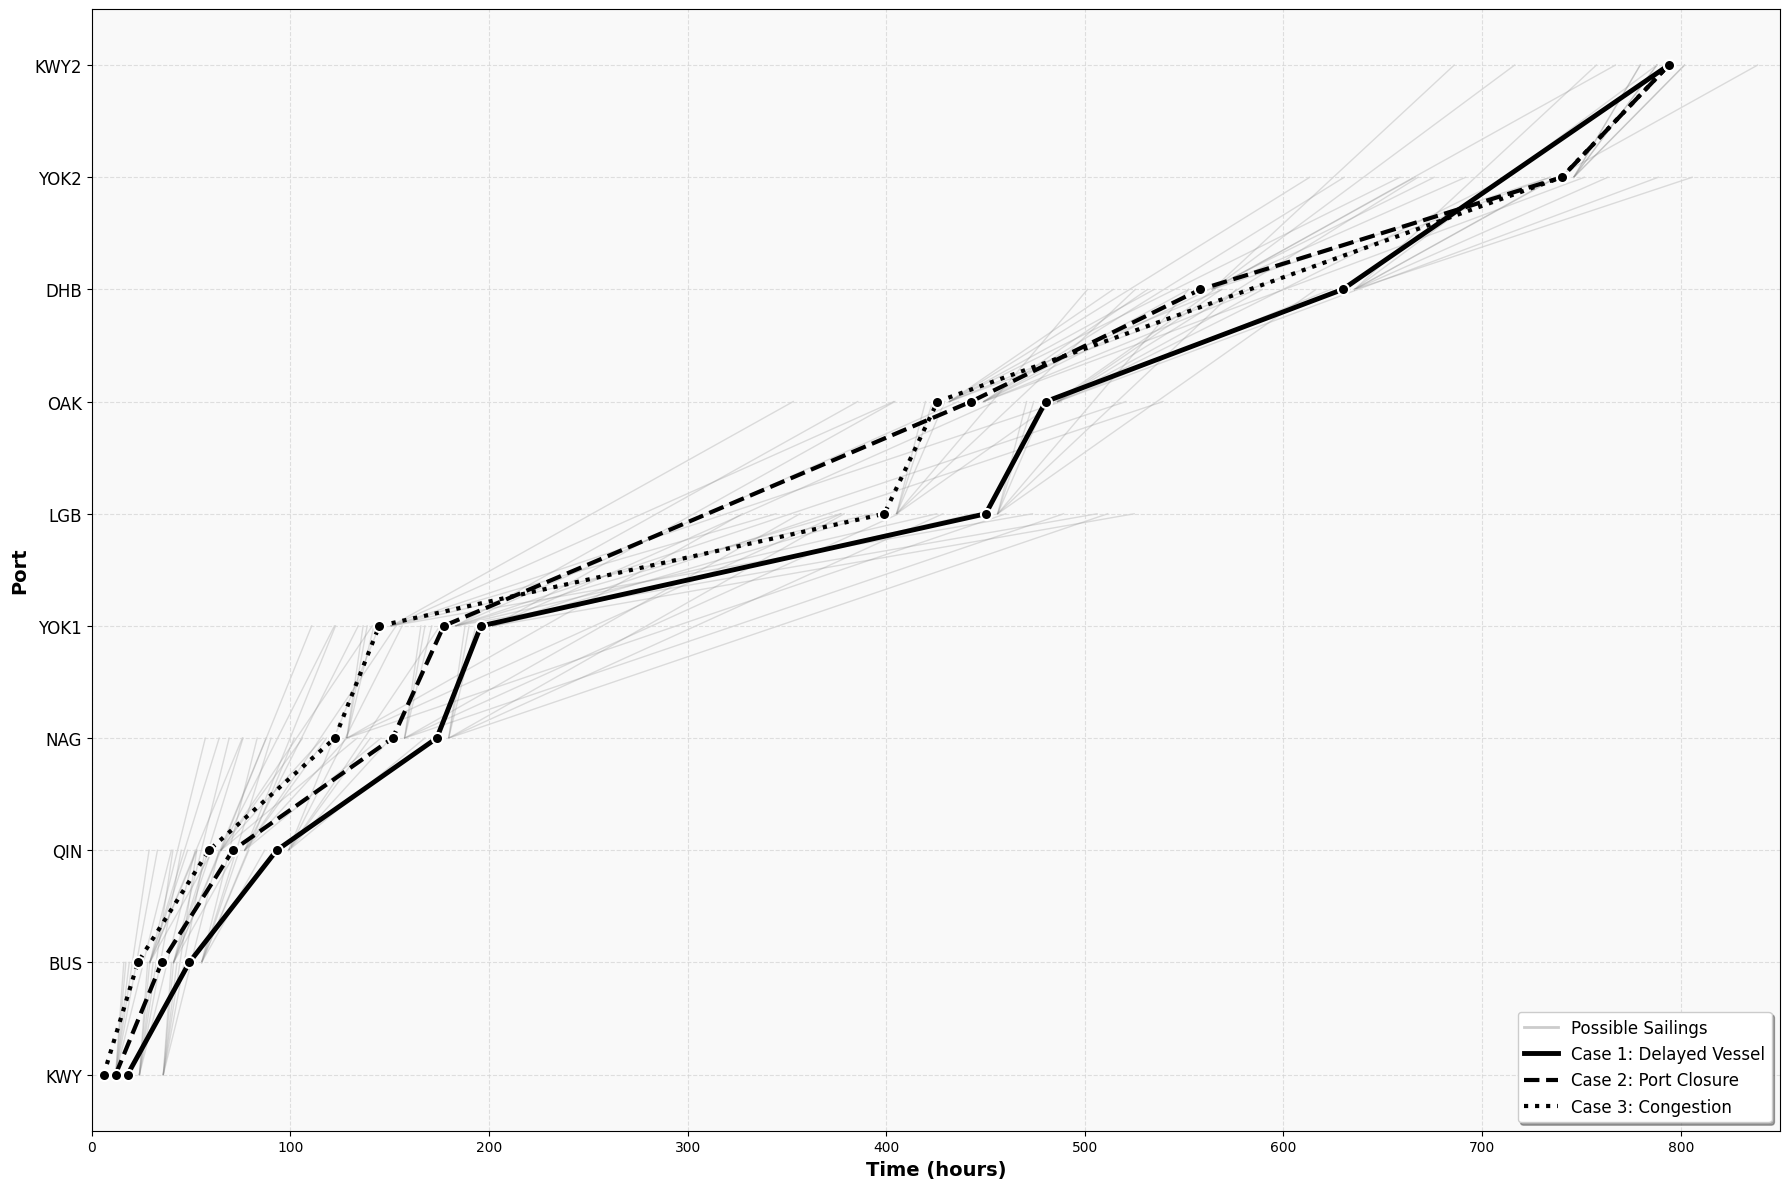

In [20]:
###Illustration of the case routes###
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

def create_vsrp_time_space_plot():
    """
    Creates a monochrome time-space network visualization that accurately reflects
    the VSRP model's decision space and the optimal solutions for three distinct scenarios,
    representing port visits as single points in time.
    """
    
    # --- Data Setup ---
    ports = ['KWY', 'BUS', 'QIN', 'NAG', 'YOK1', 'LGB', 'OAK', 'DHB', 'YOK2', 'KWY2']
    port_positions = {port: i for i, port in enumerate(ports)}
    
    distances = {
        ('KWY', 'BUS'): 103, ('BUS', 'QIN'): 476, ('QIN', 'NAG'): 1029,
        ('NAG', 'YOK1'): 205, ('YOK1', 'LGB'): 4844, ('LGB', 'OAK'): 364,
        ('OAK', 'DHB'): 2062, ('DHB', 'YOK2'): 2550, ('YOK2', 'KWY2'): 837,
        ('KWY', 'QIN'): 421, ('BUS', 'NAG'): 699, ('QIN', 'YOK1'): 1143,
        ('NAG', 'LGB'): 4977, ('YOK1', 'OAK'): 5061, ('LGB', 'DHB'): 2404,
        ('OAK', 'YOK2'): 4536, ('DHB', 'KWY2'): 3044,
    }
    
    speed_values = {1: 15.0, 2: 20.0, 3: 25.0} # SLOW, NORMAL, FAST

    # --- Corrected Solution Data ---
    case1_timeline = {
        'KWY': (0.0, 36.0), 'BUS': (42.9, 55.3), 'QIN': (87.1, 99.1), 
        'NAG': (167.7, 179.7), 'YOK1': (189.9, 201.9), 'LGB': (444.1, 456.1),
        'OAK': (474.3, 486.3), 'DHB': (623.8, 635.8), 'YOK2': None, 'KWY2': (788.0, 800.0)
    }
    case1_route = [('KWY', 'BUS', 1), ('BUS', 'QIN', 1), ('QIN', 'NAG', 1), ('NAG', 'YOK1', 2), 
                   ('YOK1', 'LGB', 2), ('LGB', 'OAK', 2), ('OAK', 'DHB', 1), ('DHB', 'KWY2', 2)]

    case2_timeline = {
        'KWY': (0.0, 24.0), 'BUS': (29.2, 41.2), 'QIN': (65.0, 77.0), 
        'NAG': (145.5, 157.5), 'YOK1': (171.2, 183.2), 'LGB': None, 
        'OAK': (436.3, 449.1), 'DHB': (552.2, 564.2), 'YOK2': (734.2, 746.2), 'KWY2': (788.0, 800.0)
    }
    case2_route = [('KWY', 'BUS', 2), ('BUS', 'QIN', 2), ('QIN', 'NAG', 1), ('NAG', 'YOK1', 1), 
                   ('YOK1', 'OAK', 2), ('OAK', 'DHB', 2), ('DHB', 'YOK2', 1), ('YOK2', 'KWY2', 2)]

    case3_timeline = {
        'KWY': (0.0, 12.0), 'BUS': (17.2, 29.2), 'QIN': (53.0, 65.0), 
        'NAG': (116.4, 128.4), 'YOK1': (138.7, 150.7), 'LGB': (392.9, 405.2),
        'OAK': (419.8, 431.8), 'DHB': None, 'YOK2': (734.1, 746.1), 'KWY2': (788.0, 800.0)
    }
    case3_route = [('KWY', 'BUS', 2), ('BUS', 'QIN', 2), ('QIN', 'NAG', 2), ('NAG', 'YOK1', 2), 
                   ('YOK1', 'LGB', 2), ('LGB', 'OAK', 3), ('OAK', 'YOK2', 1), ('YOK2', 'KWY2', 2)]
    
    cases = [
        ('Case 1: Delayed Vessel', case1_timeline, case1_route),
        ('Case 2: Port Closure', case2_timeline, case2_route),
        ('Case 3: Congestion', case3_timeline, case3_route)
    ]

    # --- Plot Generation ---
    fig, ax = plt.subplots(figsize=(18, 12))
    ax.set_facecolor('#f9f9f9')

    # --- Plot Background: All Possible Edges from the Model ---
    def generate_model_edges():
        model_edges = []
        for i in range(len(ports) - 1):
            for speed in [1, 2, 3]:
                model_edges.append({'from': ports[i], 'to': ports[i+1], 'speed': speed})
        for i in range(len(ports) - 2):
            for speed in [1, 2, 3]:
                model_edges.append({'from': ports[i], 'to': ports[i+2], 'speed': speed})
        return model_edges

    all_model_edges = generate_model_edges()
    
    all_departure_points = {}
    for _, timeline, _ in cases:
        for port, times in timeline.items():
            if times:
                if port not in all_departure_points: all_departure_points[port] = set()
                all_departure_points[port].add(times[1])

    for from_port, departure_times in all_departure_points.items():
        for dep_time in departure_times:
            for edge in all_model_edges:
                if edge['from'] == from_port:
                    dist = distances.get((edge['from'], edge['to']))
                    if dist:
                        travel_time = dist / speed_values[edge['speed']]
                        arr_time = dep_time + travel_time
                        ax.plot([dep_time, arr_time], 
                                [port_positions[edge['from']], port_positions[edge['to']]],
                                color='gray', alpha=0.25, linewidth=1, zorder=1)

    # --- Plot Optimal Solutions ---
    linestyles = ['-', '--', ':']
    linewidths = [3.5, 3.0, 3.0]
    
    for idx, (case_name, timeline, route) in enumerate(cases):
        path_times = []
        path_ports = []
        
        # Build a continuous path by taking the midpoint of the port stay
        # Add the first port of the route
        start_port_name = route[0][0]
        if timeline[start_port_name]:
            start_times = timeline[start_port_name]
            path_times.append((start_times[0] + start_times[1]) / 2)
            path_ports.append(port_positions[start_port_name])

        # Add all subsequent ports in the route
        for _, to_port_name, _ in route:
            if timeline[to_port_name]:
                port_times = timeline[to_port_name]
                path_times.append((port_times[0] + port_times[1]) / 2)
                path_ports.append(port_positions[to_port_name])
        
        # Plot the continuous path
        if len(path_times) > 1:
            ax.plot(path_times, path_ports,
                    color='black', linewidth=linewidths[idx], 
                    linestyle=linestyles[idx], zorder=5,
                    marker='o', markersize=8, markerfacecolor='black',
                    markeredgecolor='white', markeredgewidth=1.5)

    # --- Final Touches ---
    ax.set_xlabel('Time (hours)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Port', fontsize=14, fontweight='bold')
    
    
    ax.set_yticks(range(len(ports)))
    ax.set_yticklabels(ports, fontsize=12)
    ax.set_ylim(-0.5, len(ports) - 0.5)
    ax.set_xlim(0, 850)
    ax.grid(True, which='major', axis='both', linestyle='--', color='#d3d3d3', alpha=0.7)
    
    # Legend
    legend_elements = [
        plt.Line2D([0], [0], color='gray', alpha=0.4, linewidth=2, label='Possible Sailings'),
        plt.Line2D([0], [0], color='black', linewidth=3.5, linestyle='-', label='Case 1: Delayed Vessel'),
        plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='--', label='Case 2: Port Closure'),
        plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle=':', label='Case 3: Congestion'),
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=12, frameon=True, fancybox=True, shadow=True)
    
    plt.tight_layout()
    plt.show()

# Run the visualization
create_vsrp_time_space_plot()

# Multi-Vessel Fleet Disruption Scenario Analysis

## Enhanced Model Overview
This enhanced implementation extends the single-vessel VSRP model to handle **fleet-level coordination** across multiple vessels facing simultaneous disruptions. The model demonstrates how modern liner shipping companies coordinate recovery strategies across their fleet when multiple vessels encounter operational challenges.

## Key Enhancements from Single-Vessel Model

### Fleet Coordination
- **3 vessels operating simultaneously** 
- Each vessel can have **different initial delays** 
- **Independent routing decisions** per vessel while sharing the same port network
- Container groups are **pre-assigned to specific vessels**

### Expanded Speed Options
- **11 discrete speed levels** (15-25 knots) vs. 3 in original model
- Speed categories: SLOW (15-19 knots), NORMAL (20 knots), FAST (21-25 knots)

### Extended Port Skipping Capabilities
- Can skip up to **3 consecutive ports** (vs. 1 in original)
- Enables more aggressive schedule recovery strategies
- Complete distance matrix for all skip combinations

## Scenarios Remain Consistent
The three disruption scenarios (delayed vessels, port closure, congestion) maintain the same fundamental challenges as the single-vessel analysis, but now examine:
- **Fleet-wide impact** of port disruptions
- **Vessel coordination** to minimize overall service degradation
- **Distributed recovery strategies** across multiple vessels

## Purpose of Enhancement
This multi-vessel analysis demonstrates:
- **Fleet-level optimization** capabilities for real-world shipping operations
- **Computational scalability** of the VSRP formulation
- **Strategic flexibility** with expanded speed and skipping options
- **Industrial applicability** for managing multiple vessels simultaneously

In [21]:
"""
Enhanced Large-Scale VSRP Implementation
- Multiple vessels (3 vessels per case)
- Expanded speed options with continuous ranges
- Extended port skipping capabilities
- Variable container group sizes per vessel
"""

import xpress as xp
import numpy as np
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional, Set
from enum import Enum


# ============================================================================
# ENHANCED MODEL DEFINITION
# ============================================================================

class SpeedLevel(Enum):
    """Expanded discrete speed levels for vessels"""
    SLOW_15 = 15     # 15 knots
    SLOW_16 = 16     # 16 knots
    SLOW_17 = 17     # 17 knots
    SLOW_18 = 18     # 18 knots
    SLOW_19 = 19     # 19 knots
    NORMAL = 20      # 20 knots (baseline)
    FAST_21 = 21     # 21 knots
    FAST_22 = 22     # 22 knots
    FAST_23 = 23     # 23 knots
    FAST_24 = 24     # 24 knots
    FAST_25 = 25     # 25 knots

class PortDuration(Enum):
    """Port operation duration options"""
    STANDARD = 1   # Standard operation (24 hours)
    EXPEDITED = 2  # Expedited operation (12 hours)

class RecoveryStrategy(Enum):
    """Recovery strategy types with hierarchical penalties"""
    SPEED_UP = 1         # Level A1: Speed increase
    EXPEDITED_PORT = 2   # Level A2: Expedited port handling
    PORT_SWAP = 3        # Level B: Port swapping
    PORT_OMISSION = 4    # Level C: Port omission

@dataclass(frozen=True, eq=True)
class Edge:
    """Edge in the time-space network"""
    vessel_id: int
    from_port: int
    to_port: int
    speed: SpeedLevel
    travel_time: float
    fuel_cost: float
    covers_port: int
    skip_count: int = 0  # Number of ports skipped (0=consecutive, 1=skip 1 port, etc.)
    is_swap: bool = False
    is_omission: bool = False
    
    def __hash__(self):
        return hash((self.vessel_id, self.from_port, self.to_port, self.speed.value, 
                     self.skip_count, self.is_swap, self.is_omission))

@dataclass
class ContainerGroup:
    """Container group with transportation requirements"""
    id: str
    vessel_id: int
    origin: int
    destination: int
    transshipment_ports: List[int]
    quantity: int
    promised_arrival: float
    delay_penalty: float
    misconnection_penalty: float

class EnhancedVSRPModel:
    """
    Enhanced multi-vessel VSRP optimization model with expanded speed options
    """
    
    def __init__(self, n_vessels: int = 3):
        """Initialize the model with multiple vessels"""
        
        self.model = xp.problem("EnhancedVSRP")
        self.n_vessels = n_vessels
        print(f"✓ Model initialized with {self.n_vessels} vessels")
        
        # Enhanced speed values mapping (all 11 levels restored)
        self.speed_values = {
            SpeedLevel.SLOW_15: 15.0, SpeedLevel.SLOW_16: 16.0, SpeedLevel.SLOW_17: 17.0,
            SpeedLevel.SLOW_18: 18.0, SpeedLevel.SLOW_19: 19.0, SpeedLevel.NORMAL: 20.0,
            SpeedLevel.FAST_21: 21.0, SpeedLevel.FAST_22: 22.0, SpeedLevel.FAST_23: 23.0,
            SpeedLevel.FAST_24: 24.0, SpeedLevel.FAST_25: 25.0
        }
        
        # Speed categories for penalty calculation
        self.speed_categories = {
            'SLOW': [SpeedLevel.SLOW_15, SpeedLevel.SLOW_16, SpeedLevel.SLOW_17, 
                    SpeedLevel.SLOW_18, SpeedLevel.SLOW_19],
            'NORMAL': [SpeedLevel.NORMAL],
            'FAST': [SpeedLevel.FAST_21, SpeedLevel.FAST_22, SpeedLevel.FAST_23,
                    SpeedLevel.FAST_24, SpeedLevel.FAST_25]
        }
        
        self.fuel_price = 600.0
        self.fuel_beta = 3.0
        self.fuel_k = 0.005
        self.port_durations = {PortDuration.STANDARD: 24.0, PortDuration.EXPEDITED: 12.0}
        self.port_costs = {PortDuration.STANDARD: 5000.0, PortDuration.EXPEDITED: 15000.0}
        
        self.strategy_penalties = {
            RecoveryStrategy.SPEED_UP: 1000.0, 
            RecoveryStrategy.EXPEDITED_PORT: 2000.0,
            RecoveryStrategy.PORT_SWAP: 10000.0, 
            RecoveryStrategy.PORT_OMISSION: 25000.0
        }
        
        self.alpha = 0.5
        self.time_horizon = 1000
        self.max_skip_distance = 3  # Restored to 3
        
        # NEW: Port-specific penalty dictionary for enhanced model
        self.port_penalties = {}
        
        # Variables
        self.x, self.w, self.b, self.o, self.y, self.t_arr, self.t_dep = {}, {}, {}, {}, {}, {}, {}

    def build_model(self, ports: List[str], distances: Dict[Tuple[str, str], float],
                    containers: List[ContainerGroup], vessel_delays: List[float] = None,
                    original_schedule: Dict[str, float] = None, port_penalties: Dict[int, float] = None):
        self.ports, self.n_ports = ports, len(ports)
        self.distances, self.containers = distances, containers
        self.vessel_delays = vessel_delays or [0] * self.n_vessels
        self.original_schedule = original_schedule or self._calculate_original_schedule()
        
        # NEW: Set port-specific penalties for enhanced model
        self.port_penalties = port_penalties or {}
        
        self.edges = self._build_enhanced_time_space_network()
        self._create_variables()
        self._create_objective()
        self._create_constraints()

    def _calculate_original_schedule(self) -> Dict[str, float]:
        schedule, current_time = {}, 0
        for i, port in enumerate(self.ports):
            schedule[port] = current_time
            if i < len(self.ports) - 1:
                next_port = self.ports[i + 1]
                if (port, next_port) in self.distances:
                    distance = self.distances.get((port, next_port), 0)
                    travel_time = distance / self.speed_values[SpeedLevel.NORMAL]
                    current_time += travel_time + self.port_durations[PortDuration.STANDARD]
        return schedule
    
    def _build_enhanced_time_space_network(self) -> List[Edge]:
        """Build enhanced network with multiple vessels and extended skipping options"""
        edges = set()
        
        for vessel_id in range(self.n_vessels):
            # Consecutive port connections
            for i in range(self.n_ports - 1):
                for speed in SpeedLevel:
                    if edge := self._create_edge(vessel_id, i, i+1, speed, skip_count=0):
                        edges.add(edge)
            
            # Extended port skipping options (skip 1, 2, or 3 ports)
            for skip_count in range(1, min(self.max_skip_distance + 1, self.n_ports - 1)):
                for i in range(self.n_ports - skip_count - 1):
                    target_port = i + skip_count + 1
                    if target_port < self.n_ports:
                        for speed in SpeedLevel:
                            if edge := self._create_edge(vessel_id, i, target_port, speed, skip_count=skip_count):
                                edges.add(edge)
        
        return list(edges)

    def _create_edge(self, vessel_id: int, from_port: int, to_port: int, 
                    speed: SpeedLevel, skip_count: int = 0) -> Optional[Edge]:
        """Create edge with enhanced distance calculation for skipping"""
        from_name, to_name = self.ports[from_port], self.ports[to_port]
        
        # For skipped ports, calculate total distance
        if skip_count == 0:
            # Direct consecutive connection
            if (from_name, to_name) in self.distances:
                distance = self.distances[(from_name, to_name)]
            else:
                return None
        else:
            # Calculate distance through skipped ports
            distance = 0
            current_port = from_port
            
            for step in range(skip_count + 1):
                next_port = current_port + 1
                if next_port >= self.n_ports:
                    return None
                    
                current_name = self.ports[current_port]
                next_name = self.ports[next_port]
                
                if (current_name, next_name) in self.distances:
                    distance += self.distances[(current_name, next_name)]
                else:
                    return None
                    
                current_port = next_port
        
        if distance > 0:
            speed_value = self.speed_values[speed]
            travel_time = distance / speed_value
            daily_consumption = self.fuel_k * (speed_value ** self.fuel_beta)
            fuel_cost = daily_consumption * (travel_time / 24.0) * self.fuel_price
            
            return Edge(
                vessel_id=vessel_id,
                from_port=from_port,
                to_port=to_port,
                speed=speed,
                travel_time=travel_time,
                fuel_cost=fuel_cost,
                covers_port=to_port,
                skip_count=skip_count,
                is_omission=(skip_count > 0)
            )
        return None

    def _create_variables(self):
        """Create variables for multi-vessel model using addVariables with proper dimensions"""
        
        edge_map = {}
        edge_count = 0
        for e in self.edges:
            if e.vessel_id < self.n_vessels:
                if e.vessel_id not in edge_map:
                    edge_map[e.vessel_id] = {}
                edge_map[e.vessel_id][edge_count] = e
                edge_count += 1
        
        max_edges_per_vessel = max(len(edge_map.get(v, {})) for v in range(self.n_vessels))
        
        
        x_array = self.model.addVariables(self.n_vessels, max_edges_per_vessel, 
                                         len(PortDuration), vartype=xp.binary, name="x")
        
        
        self.x = {}
        for v in range(self.n_vessels):
            edge_idx = 0
            for e in self.edges:
                if e.vessel_id == v:
                    for d_idx, d in enumerate(PortDuration):
                        if edge_idx < max_edges_per_vessel:
                            self.x[(v, e, d)] = x_array[v, edge_idx, d_idx]
                    edge_idx += 1
        
        
        w_array = self.model.addVariables(self.n_vessels, self.n_ports, 
                                         len(PortDuration), vartype=xp.binary, name="w")
        
        self.w = {}
        for v in range(self.n_vessels):
            for p in range(self.n_ports):
                for d_idx, d in enumerate(PortDuration):
                    self.w[(v, p, d)] = w_array[v, p, d_idx]
        
        
        b_array = self.model.addVariables(self.n_vessels, self.n_ports, 
                                         len(RecoveryStrategy), vartype=xp.binary, name="b")
        
        self.b = {}
        for v in range(self.n_vessels):
            for p in range(self.n_ports):
                for s_idx, s in enumerate(RecoveryStrategy):
                    self.b[(v, p, s)] = b_array[v, p, s_idx]
        
        
        o_array = self.model.addVariables(len(self.containers), vartype=xp.binary, name="o")
        y_array = self.model.addVariables(len(self.containers), vartype=xp.binary, name="y")
        
        self.o = {}
        self.y = {}
        for c_idx, c in enumerate(self.containers):
            self.o[c.id] = o_array[c_idx]
            self.y[c.id] = y_array[c_idx]
        
        
        t_arr_array = self.model.addVariables(self.n_vessels, self.n_ports, 
                                             vartype=xp.continuous, name="t_arr")
        t_dep_array = self.model.addVariables(self.n_vessels, self.n_ports, 
                                             vartype=xp.continuous, name="t_dep")
        
        self.t_arr = {}
        self.t_dep = {}
        for v in range(self.n_vessels):
            for p in range(self.n_ports):
                self.t_arr[(v, p)] = t_arr_array[v, p]
                self.t_dep[(v, p)] = t_dep_array[v, p]
                # Set bounds
                t_arr_array[v, p].lb = 0
                t_arr_array[v, p].ub = self.time_horizon
                t_dep_array[v, p].lb = 0
                t_dep_array[v, p].ub = self.time_horizon
        
        
        aux_speedup = self.model.addVariables(self.n_vessels, self.n_ports, 
                                             vartype=xp.binary, name="aux_speedup")
        aux_swap = self.model.addVariables(self.n_vessels, self.n_ports, 
                                          vartype=xp.binary, name="aux_swap")
        
        self.aux_vars = {}
        for v in range(self.n_vessels):
            for p in range(self.n_ports):
                self.aux_vars[f"aux_speedup_v{v}_{p}"] = aux_speedup[v, p]
                self.aux_vars[f"aux_swap_v{v}_{p}"] = aux_swap[v, p]

    def _create_objective(self):
        """Enhanced objective with multi-vessel considerations and port-specific penalties"""
        # Service cost (container delays and misconnections)
        service_cost = xp.Sum(c.delay_penalty * self.o[c.id] + c.misconnection_penalty * self.y[c.id] 
                             for c in self.containers)
        
        # Strategy penalty costs
        strategy_cost = xp.Sum(self.strategy_penalties[s] * self.b[v, p, s] 
                              for v, p, s in self.b)
        
        # Operational costs (fuel and port costs)
        fuel_cost = xp.Sum(e.fuel_cost * self.x[v, e, d] for v, e, d in self.x)
        port_cost = xp.Sum(self.port_costs[d] * self.w[v, p, d] for v, p, d in self.w)
        
        # NEW: Add port-specific penalty costs for enhanced model
        port_penalty_cost = 0
        if self.port_penalties:
            for port_idx, penalty in self.port_penalties.items():
                # Sum over all vessels visiting this port
                for v in range(self.n_vessels):
                    port_penalty_cost += penalty * xp.Sum(self.w[v2, p, d] for v2, p, d in self.w.keys() 
                                                         if v2 == v and p == port_idx)
        
        total_service_cost = service_cost + strategy_cost + port_penalty_cost
        total_operational_cost = fuel_cost + port_cost
        
        self.model.setObjective(self.alpha * total_service_cost + (1 - self.alpha) * total_operational_cost, 
                               sense=xp.minimize)

    def _create_constraints(self):
        """Create constraints for multi-vessel model"""
        self._add_multi_vessel_flow_constraints()
        self._add_multi_vessel_port_constraints()
        self._add_multi_vessel_strategy_constraints()
        self._add_enhanced_container_constraints()
        self._add_multi_vessel_time_constraints()
        self._add_enhanced_recovery_limits()

    def _add_multi_vessel_flow_constraints(self):
        """Flow conservation for each vessel"""
        for v in range(self.n_vessels):
            # Each vessel must start from port 0
            start_edges = [self.x[vessel, edge, duration] for (vessel, edge, duration) in self.x.keys() 
                          if vessel == v and edge.from_port == 0]
            if start_edges:
                self.model.addConstraint(xp.Sum(start_edges) == 1)
            
            # Each vessel must end at final port
            final_port = self.n_ports - 1
            end_edges = [self.x[vessel, edge, duration] for (vessel, edge, duration) in self.x.keys() 
                        if vessel == v and edge.to_port == final_port]
            if end_edges:
                self.model.addConstraint(xp.Sum(end_edges) == 1)
            
            # Flow conservation for intermediate ports
            for p in range(1, self.n_ports - 1):
                incoming = [self.x[vessel, edge, duration] for (vessel, edge, duration) in self.x.keys() 
                           if vessel == v and edge.to_port == p]
                outgoing = [self.x[vessel, edge, duration] for (vessel, edge, duration) in self.x.keys() 
                           if vessel == v and edge.from_port == p]
                
                is_visited = 1 - self.b[v, p, RecoveryStrategy.PORT_OMISSION]
                
                if incoming:
                    self.model.addConstraint(xp.Sum(incoming) == is_visited)
                if outgoing:
                    self.model.addConstraint(xp.Sum(outgoing) == is_visited)

    def _add_multi_vessel_port_constraints(self):
        """Port operation constraints for each vessel"""
        for v in range(self.n_vessels):
            # Starting port must have duration
            start_durations = [self.w[vessel, port, duration] for (vessel, port, duration) in self.w.keys() 
                              if vessel == v and port == 0]
            if start_durations:
                self.model.addConstraint(xp.Sum(start_durations) == 1)
            
            # Port duration consistency
            for p in range(1, self.n_ports):
                is_visited_edges = [self.x[vessel, edge, duration] for (vessel, edge, duration) in self.x.keys() 
                                   if vessel == v and edge.to_port == p]
                port_durations = [self.w[vessel, port, duration] for (vessel, port, duration) in self.w.keys() 
                                 if vessel == v and port == p]
                
                if is_visited_edges and port_durations:
                    is_visited = xp.Sum(is_visited_edges)
                    self.model.addConstraint(xp.Sum(port_durations) == is_visited)

    def _add_multi_vessel_strategy_constraints(self):
        """Strategy detection for each vessel"""
        for v in range(self.n_vessels):
            for p in range(self.n_ports):
                # Speed-up strategy detection (using FAST category speeds)
                fast_speeds = self.speed_categories['FAST']
                fast_speed_edges = [self.x[vessel, edge, duration] for (vessel, edge, duration) in self.x.keys() 
                                   if vessel == v and edge.to_port == p and edge.speed in fast_speeds]
                
                has_sped_up = self.aux_vars[f"aux_speedup_v{v}_{p}"]
                
                if fast_speed_edges:
                    is_sped_up = xp.Sum(fast_speed_edges)
                    self.model.addConstraint(is_sped_up >= has_sped_up)
                    self.model.addConstraint(is_sped_up <= self.n_ports * has_sped_up)
                    self.model.addConstraint(self.b[v, p, RecoveryStrategy.SPEED_UP] == has_sped_up)
                
                # Expedited port strategy
                expedited_port = [self.w[vessel, port, duration] for (vessel, port, duration) in self.w.keys() 
                                 if vessel == v and port == p and duration == PortDuration.EXPEDITED]
                if expedited_port:
                    self.model.addConstraint(self.b[v, p, RecoveryStrategy.EXPEDITED_PORT] == expedited_port[0])

    def _add_enhanced_container_constraints(self):
        """Enhanced container constraints for multi-vessel model"""
        for c in self.containers:
            vessel_id = c.vessel_id
            
            # Container delay logic
            self.model.addConstraint(self.y[c.id] <= self.o[c.id])
            
            M = self.time_horizon * 2
            self.model.addConstraint(
                self.t_arr[vessel_id, c.destination] - c.promised_arrival <= M * self.o[c.id]
            )
            self.model.addConstraint(
                self.t_arr[vessel_id, c.destination] - c.promised_arrival >= -M * (1 - self.o[c.id])
            )
            
            # Misconnection due to port omission
            required_ports = {c.origin, c.destination} | set(c.transshipment_ports)
            for p_idx in required_ports:
                if 0 < p_idx < self.n_ports - 1:
                    self.model.addConstraint(
                        self.b[vessel_id, p_idx, RecoveryStrategy.PORT_OMISSION] <= self.y[c.id]
                    )

    def _add_multi_vessel_time_constraints(self):
        """Time constraints for each vessel"""
        for v in range(self.n_vessels):
            # Starting conditions
            self.model.addConstraint(self.t_arr[v, 0] == 0)
            self.model.addConstraint(self.t_dep[v, 0] >= self.vessel_delays[v])
            
            M = self.time_horizon * 2
            
            # Port stay time constraints
            for p in range(self.n_ports):
                port_stay_terms = [self.port_durations[duration] * self.w[vessel, port, duration] 
                                  for (vessel, port, duration) in self.w.keys() 
                                  if vessel == v and port == p]
                
                if port_stay_terms:
                    port_stay = xp.Sum(port_stay_terms)
                    is_visited = 1 if p in [0, self.n_ports-1] else (1 - self.b[v, p, RecoveryStrategy.PORT_OMISSION])
                    self.model.addConstraint(
                        self.t_dep[v, p] >= self.t_arr[v, p] + port_stay - M * (1 - is_visited)
                    )
            
            # Travel time constraints
            for (vessel, edge, duration), var in self.x.items():
                if vessel == v:
                    self.model.addConstraint(
                        self.t_arr[v, edge.to_port] >= 
                        self.t_dep[v, edge.from_port] + edge.travel_time - M * (1 - var)
                    )

    def _add_enhanced_recovery_limits(self):
        """Enhanced recovery strategy limits"""
        for v in range(self.n_vessels):
            # Limit port omissions per vessel
            self.model.addConstraint(
                xp.Sum(self.b[v, p, RecoveryStrategy.PORT_OMISSION] 
                      for p in range(1, self.n_ports - 1)) <= 2  # Allow up to 2 omissions per vessel
            )
            
            # Limit port swaps per vessel
            self.model.addConstraint(
                xp.Sum(self.b[v, p, RecoveryStrategy.PORT_SWAP] for p in range(self.n_ports)) <= 3
            )

    def solve(self, time_limit: int = 300):  # Extended time limit for larger problems
        print(f"\nSolving Enhanced VSRP Model with {self.n_vessels} vessels...")
        print(f"Total variables: {len(self.x) + len(self.w) + len(self.b) + len(self.o) + len(self.y) + len(self.t_arr) + len(self.t_dep)}")
        print(f"Total edges: {len(self.edges)}")
        
        self.model.controls.maxtime = time_limit
        self.model.controls.outputlog = 1
        
        solvestatus, solstatus = self.model.optimize()
        
        print(f"Solver status: {solstatus}")
        
        if solstatus in [xp.SolStatus.OPTIMAL, xp.SolStatus.FEASIBLE]:
            print(f"✓ Solution found! Objective value: ${self.model.attributes.objval:,.2f}")
            return self._extract_multi_vessel_solution()
        else:
            print(f"✗ No feasible solution found")
        return None

    def _extract_multi_vessel_solution(self):
        """Extract solution for multi-vessel model"""
        solution = {
            'objective': self.model.attributes.objval,
            'vessels': {},
            'container_status': {},
            'total_strategies': {},
            'fleet_summary': {}
        }
        
        # Extract solution for each vessel
        for v in range(self.n_vessels):
            vessel_solution = {
                'route': [],
                'timeline': {},
                'strategies': [],
                'skipped_ports': []
            }
            
            # Extract route
            selected_edges = []
            for (vessel, edge, duration), var in self.x.items():
                if vessel == v and self.model.getSolution(var) > 0.5:
                    selected_edges.append({'edge': edge, 'duration': duration})
            
            selected_edges.sort(key=lambda item: self.model.getSolution(self.t_dep[v, item['edge'].from_port]))
            
            for item in selected_edges:
                edge, duration = item['edge'], item['duration']
                vessel_solution['route'].append({
                    'from': self.ports[edge.from_port],
                    'to': self.ports[edge.to_port],
                    'speed': edge.speed.name,
                    'skip_count': edge.skip_count,
                    'duration': duration.name
                })
            
            # Extract timeline
            for p in range(self.n_ports):
                vessel_solution['timeline'][self.ports[p]] = {
                    'arrival': self.model.getSolution(self.t_arr[v, p]),
                    'departure': self.model.getSolution(self.t_dep[v, p]),
                    'original_arrival': self.original_schedule[self.ports[p]]
                }
            
            # Extract strategies
            for (vessel, port, strategy), var in self.b.items():
                if vessel == v and self.model.getSolution(var) > 0.5:
                    vessel_solution['strategies'].append({
                        'port': self.ports[port], 
                        'strategy': strategy.name
                    })
                    if strategy == RecoveryStrategy.PORT_OMISSION:
                        vessel_solution['skipped_ports'].append(self.ports[port])
            
            solution['vessels'][f'Vessel_{v+1}'] = vessel_solution
        
        # Extract container status
        for c in self.containers:
            solution['container_status'][c.id] = {
                'delayed': self.model.getSolution(self.o[c.id]) > 0.5,
                'misconnected': self.model.getSolution(self.y[c.id]) > 0.5,
                'vessel': c.vessel_id + 1
            }
        
        return solution

    def print_multi_vessel_solution(self, solution):
        """Print enhanced solution for multi-vessel model with port penalty information"""
        if not solution:
            return
            
        print("\n" + "="*80)
        print("ENHANCED MULTI-VESSEL VSRP SOLUTION")
        print("="*80)
        print(f"\nFleet Objective Value: ${solution['objective']:,.2f}")
        
        # Print port penalties if any
        if self.port_penalties:
            print("\n--- Port-Specific Penalties ---")
            for port_idx, penalty in self.port_penalties.items():
                port_name = self.ports[port_idx]
                # Check if any vessel visited this port
                vessels_visited = []
                for v in range(self.n_vessels):
                    is_visited = any(self.model.getSolution(self.w[v2, p, d]) > 0.5 
                                   for v2, p, d in self.w.keys() 
                                   if v2 == v and p == port_idx)
                    if is_visited:
                        vessels_visited.append(f"V{v+1}")
                
                if vessels_visited:
                    print(f"  {port_name:5}: ${penalty:,} penalty [VISITED by {', '.join(vessels_visited)}]")
                else:
                    print(f"  {port_name:5}: ${penalty:,} penalty [AVOIDED by all vessels]")
        
        # Print solution for each vessel
        for vessel_name, vessel_data in solution['vessels'].items():
            print(f"\n--- {vessel_name} Route ---")
            for leg in vessel_data['route']:
                skip_info = f" [SKIP {leg['skip_count']} PORTS]" if leg['skip_count'] > 0 else ""
                print(f"  {leg['from']:5} → {leg['to']:5}: {leg['speed']:8}, Port handling: {leg['duration']:9}{skip_info}")
            
            if vessel_data['skipped_ports']:
                print(f"  Skipped: {', '.join(vessel_data['skipped_ports'])}")
        
        # Fleet summary
        total_strategies = {}
        total_delayed = sum(c['delayed'] for c in solution['container_status'].values())
        total_misconnected = sum(c['misconnected'] for c in solution['container_status'].values())
        
        for vessel_data in solution['vessels'].values():
            for strategy in vessel_data['strategies']:
                strategy_name = strategy['strategy']
                total_strategies[strategy_name] = total_strategies.get(strategy_name, 0) + 1
        
        print(f"\n--- Fleet Summary ---")
        print(f"Total Containers: {len(solution['container_status'])}")
        print(f"Delayed Containers: {total_delayed}")
        print(f"Misconnected Containers: {total_misconnected}")
        print(f"Recovery Strategies Used: {total_strategies}")
        print("="*80)

# ============================================================================
# ENHANCED TEST CASE IMPLEMENTATIONS
# ============================================================================

def generate_multi_vessel_containers(ports: List[str], distances: Dict[Tuple[str, str], float], 
                                    container_counts: List[int], seed: int) -> List[ContainerGroup]:
    """Generate containers for multiple vessels with varying container group sizes"""
    np.random.seed(seed)
    all_containers = []
    normal_schedule = calculate_normal_schedule(ports, distances)
    
    container_id = 1
    for vessel_id, n_containers in enumerate(container_counts):
        for i in range(n_containers):
            # Origin ports (first 3 ports)
            origin = np.random.randint(0, 3)
            # Destination ports (last 5 ports)
            destination = np.random.randint(5, 10)
            
            # Promised arrival with some variance
            base_arrival = normal_schedule[ports[destination]]
            promised_arrival = base_arrival + np.random.uniform(-15, 15)
            
            container = ContainerGroup(
                id=f'V{vessel_id+1}_C{i+1:03d}',
                vessel_id=vessel_id,
                origin=origin,
                destination=destination,
                transshipment_ports=[],
                quantity=np.random.randint(100, 501),
                promised_arrival=promised_arrival,
                delay_penalty=200.0,
                misconnection_penalty=1000.0
            )
            all_containers.append(container)
            container_id += 1
    
    return all_containers

def calculate_normal_schedule(ports: List[str], distances: Dict[Tuple[str, str], float]) -> Dict[str, float]:
    """Calculate baseline schedule with normal operations"""
    schedule, current_time = {}, 0
    normal_speed, port_stay = 20.0, 24.0
    
    for i, port in enumerate(ports):
        schedule[port] = current_time
        if i < len(ports) - 1:
            next_port = ports[i+1]
            if (port, next_port) in distances:
                current_time += distances[(port, next_port)] / normal_speed + port_stay
    return schedule

def get_enhanced_base_data() -> Tuple[List[str], Dict[Tuple[str, str], float]]:
    """Enhanced port and distance data with complete distance matrix"""
    ports = ['KWY','BUS','QIN','NAG','YOK1','LGB','OAK','DHB','YOK2','KWY2']
    
    # Complete distance matrix based on the provided table
    distances = {
        # Consecutive ports (main route)
        ('KWY', 'BUS'): 103, ('BUS', 'QIN'): 476, ('QIN', 'NAG'): 1029,
        ('NAG', 'YOK1'): 205, ('YOK1', 'LGB'): 4844, ('LGB', 'OAK'): 364,
        ('OAK', 'DHB'): 2062, ('DHB', 'YOK2'): 2550, ('YOK2', 'KWY2'): 837,
        
        # Skip 1 port connections
        ('KWY', 'QIN'): 421, ('BUS', 'NAG'): 699, ('QIN', 'YOK1'): 1143,
        ('NAG', 'LGB'): 4977, ('YOK1', 'OAK'): 5061, ('LGB', 'DHB'): 2404,
        ('OAK', 'YOK2'): 4536, ('DHB', 'KWY2'): 3044,
        
        # Skip 2 ports connections (from distance table)
        ('KWY', 'NAG'): 724, ('BUS', 'YOK1'): 813, ('QIN', 'LGB'): 5748,
        ('NAG', 'OAK'): 4674, ('YOK1', 'DHB'): 4536, ('LGB', 'YOK2'): 4844,
        ('OAK', 'KWY2'): 5061,
        
        # Skip 3 ports connections
        ('KWY', 'YOK1'): 837, ('BUS', 'LGB'): 5294, ('QIN', 'OAK'): 5431,
        ('NAG', 'DHB'): 2692, ('YOK1', 'YOK2'): 4536, ('LGB', 'KWY2'): 5377,
    }
    
    return ports, distances

# ============================================================================
# ENHANCED SCENARIO IMPLEMENTATIONS
# ============================================================================

def run_enhanced_scenario_1_delayed_vessels():
    """Enhanced Case 1: Multiple vessels with different delays"""
    print("\n" + "="*90)
    print("ENHANCED CASE 1: MULTIPLE DELAYED VESSELS")
    print("3 vessels with varying delays and container loads")
    print("="*90)

    ports, distances = get_enhanced_base_data()
    container_counts = [3, 4, 3]  # Container loads for 3 vessels
    containers = generate_multi_vessel_containers(ports, distances, container_counts, seed=42)
    
    model = EnhancedVSRPModel(n_vessels=3)  # 3 vessels
    model.alpha = 0.5
    
    # Different delays for each vessel
    vessel_delays = [36, 24, 48]  # Hours
    
    model.build_model(ports, distances, containers, vessel_delays=vessel_delays)
    
    solution = model.solve(time_limit=300)  # 5 minutes
    if solution:
        model.print_multi_vessel_solution(solution)

    return {
        "Case": "1 (Multi Delayed Vessels)", 
        "V": model.n_vessels, 
        "PC": model.n_ports * model.n_vessels, 
        "CG": len(model.containers),
        "C": sum(c.quantity for c in model.containers), 
        "RH": model.time_horizon,
        "N": model.n_ports * model.n_vessels, 
        "E": len(model.edges), 
        "xe": len(model.x),
        "zh": len(model.w) + len(model.b), 
        "yc_oc": len(model.y) + len(model.o),
        "Constraints": model.model.attributes.rows if hasattr(model.model.attributes, 'rows') else 'Medium Scale'
    }

def run_enhanced_scenario_2_port_closure():
    """Enhanced Case 2: Port closure affecting multiple vessels with port-specific penalty"""
    print("\n" + "="*90)
    print("ENHANCED CASE 2: PORT CLOSURE WITH MULTIPLE VESSELS")
    print("3 vessels facing LGB port closure with specific $360,000 penalty for visiting LGB")
    print("="*90)

    ports, distances = get_enhanced_base_data()
    container_counts = [3, 4, 3]
    containers = generate_multi_vessel_containers(ports, distances, container_counts, seed=43)
    
    # Assign some containers to LGB destination
    lgb_index = ports.index('LGB')
    for i in range(0, min(3, len(containers))):
        containers[i].destination = lgb_index
    print(f"Containers destined for LGB: {[containers[i].id for i in range(min(3, len(containers)))]}")
    
    model = EnhancedVSRPModel(n_vessels=3)
    model.alpha = 0.5
    
    # NEW: Use port-specific penalty instead of global cost increase
    lgb_penalty = 72 * 5000  # $360,000 for visiting LGB during 3-day strike
    port_penalties = {lgb_index: lgb_penalty}
    
    vessel_delays = [24, 36, 12]
    
    model.build_model(ports, distances, containers, vessel_delays=vessel_delays, 
                     port_penalties=port_penalties)
    
    solution = model.solve(time_limit=300)
    if solution:
        model.print_multi_vessel_solution(solution)

    return {
        "Case": "2 (Multi Port Closure)", 
        "V": model.n_vessels, 
        "PC": model.n_ports * model.n_vessels,
        "CG": len(model.containers),
        "C": sum(c.quantity for c in model.containers), 
        "RH": model.time_horizon,
        "N": model.n_ports * model.n_vessels, 
        "E": len(model.edges), 
        "xe": len(model.x),
        "zh": len(model.w) + len(model.b), 
        "yc_oc": len(model.y) + len(model.o),
        "Constraints": model.model.attributes.rows if hasattr(model.model.attributes, 'rows') else 'Medium Scale'
    }

def run_enhanced_scenario_3_congestion():
    """Enhanced Case 3: Congestion affecting fleet operations with port-specific penalty"""
    print("\n" + "="*90)
    print("ENHANCED CASE 3: FLEET CONGESTION MANAGEMENT")
    print("3 vessels dealing with DHB congestion with specific $240,000 penalty for visiting DHB")
    print("="*90)
    
    ports, distances = get_enhanced_base_data()
    container_counts = [3, 4, 3]
    containers = generate_multi_vessel_containers(ports, distances, container_counts, seed=44)
    
    # Assign some containers to DHB destination
    dhb_index = ports.index('DHB')
    for i in range(0, min(3, len(containers))):
        containers[i].destination = dhb_index
    print(f"Containers destined for DHB: {[containers[i].id for i in range(min(3, len(containers)))]}")
    
    model = EnhancedVSRPModel(n_vessels=3)
    model.alpha = 0.5
    
    # NEW: Use port-specific penalty instead of global cost increase
    dhb_penalty = 48 * 5000  # $240,000 for visiting DHB during 2-day congestion
    port_penalties = {dhb_index: dhb_penalty}
    
    vessel_delays = [12, 24, 6]
    
    model.build_model(ports, distances, containers, vessel_delays=vessel_delays,
                     port_penalties=port_penalties)
    
    solution = model.solve(time_limit=300)
    if solution:
        model.print_multi_vessel_solution(solution)
        
    return {
        "Case": "3 (Multi Congestion)", 
        "V": model.n_vessels, 
        "PC": model.n_ports * model.n_vessels,
        "CG": len(model.containers),
        "C": sum(c.quantity for c in model.containers), 
        "RH": model.time_horizon,
        "N": model.n_ports * model.n_vessels, 
        "E": len(model.edges), 
        "xe": len(model.x),
        "zh": len(model.w) + len(model.b), 
        "yc_oc": len(model.y) + len(model.o),
        "Constraints": model.model.attributes.rows if hasattr(model.model.attributes, 'rows') else 'Medium Scale'
    }

def print_enhanced_size_summary_table(all_stats: List[Dict]):
    """Print enhanced overview table of all tested cases"""
    print("\n" + "="*120)
    print("ENHANCED TABLE: AN OVERVIEW OF THE RELATIVE SIZES OF THE MULTI-VESSEL CASES")
    print("="*120)
    
    # Header
    print(f"{'Case':<25} {'V':>3} {'PC':>3} {'CG':>3} {'C':>8} {'RH':>5} {'(N, E)':>12} {'xe':>8} {'zh':>8} {'yc/oc':>8} {'Constraints':>12}")
    print("-" * 120)

    # Data rows
    for stats in all_stats:
        ne_str = f"({stats['N']},{stats['E']})"
        yc_oc_str = f"({stats['yc_oc']//2},{stats['yc_oc']//2})"
        c_val = stats['C'] if isinstance(stats['C'], int) else 'N/A'
        constraints_val = stats['Constraints'] if stats['Constraints'] != 'N/A' else 'N/A'
        
        print(f"{stats['Case']:<25} {stats['V']:>3} {stats['PC']:>3} {stats['CG']:>3} {c_val:>8} "
              f"{stats['RH']:>5} {ne_str:>12} {stats['xe']:>8} {stats['zh']:>8} {yc_oc_str:>8} {constraints_val:>12}")
    
    print("="*120)
    print("NOTES:")
    print("- V=Vessels, PC=Port Calls, CG=Container Groups, C=Total Containers (TEU)")
    print("- RH=Recovery Horizon (hrs), (N,E)=Nodes and Edges in time-space network")
    print("- xe/zh/yc/oc=Number of decision variables of each type")
    print("- Enhanced model includes 11 speed levels and extended port skipping (up to 3 ports)")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    
    print("="*90)
    print("ENHANCED LARGE-SCALE VSRP EXPERIMENT")
    print("Multiple vessels with expanded speed options and extended port skipping")
    print("="*90)
    
    all_case_stats = []
    
    # Run enhanced scenarios
    stats1 = run_enhanced_scenario_1_delayed_vessels()
    all_case_stats.append(stats1)
    
    stats2 = run_enhanced_scenario_2_port_closure()
    all_case_stats.append(stats2)
    
    stats3 = run_enhanced_scenario_3_congestion()
    all_case_stats.append(stats3)

    # Print the enhanced summary table
    print_enhanced_size_summary_table(all_case_stats)

    print("\nENHANCED FEATURES IMPLEMENTED:")
    print("✓ 3 vessels per scenario (vs. 1 in original)")
    print("✓ 11 speed levels (15-25 knots) vs. 3 in original")
    print("✓ Extended port skipping (up to 3 consecutive ports)")
    print("✓ Complete distance matrix utilization")
    print("✓ Multi-vessel coordination constraints")

ENHANCED LARGE-SCALE VSRP EXPERIMENT
Multiple vessels with expanded speed options and extended port skipping

ENHANCED CASE 1: MULTIPLE DELAYED VESSELS
3 vessels with varying delays and container loads
✓ Model initialized with 3 vessels

Solving Enhanced VSRP Model with 3 vessels...
Total variables: 2240
Total edges: 990
FICO Xpress v9.6.0, Hyper, solve started 12:43:33, Sep 5, 2025
Heap usage: 1904KB (peak 1904KB, 1042KB system)
Minimizing MILP noname using up to 20 threads and up to 31GB memory, with these control settings:
MAXTIME = 300
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = 1
Original problem has:
      2261 rows         2300 cols        14248 elements      2240 entities
Presolved problem has:
      1660 rows         1762 cols         8438 elements      1711 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 5064KB (peak 5665KB, 1042KB system)

Coefficient range                    original                 solved        
  Co

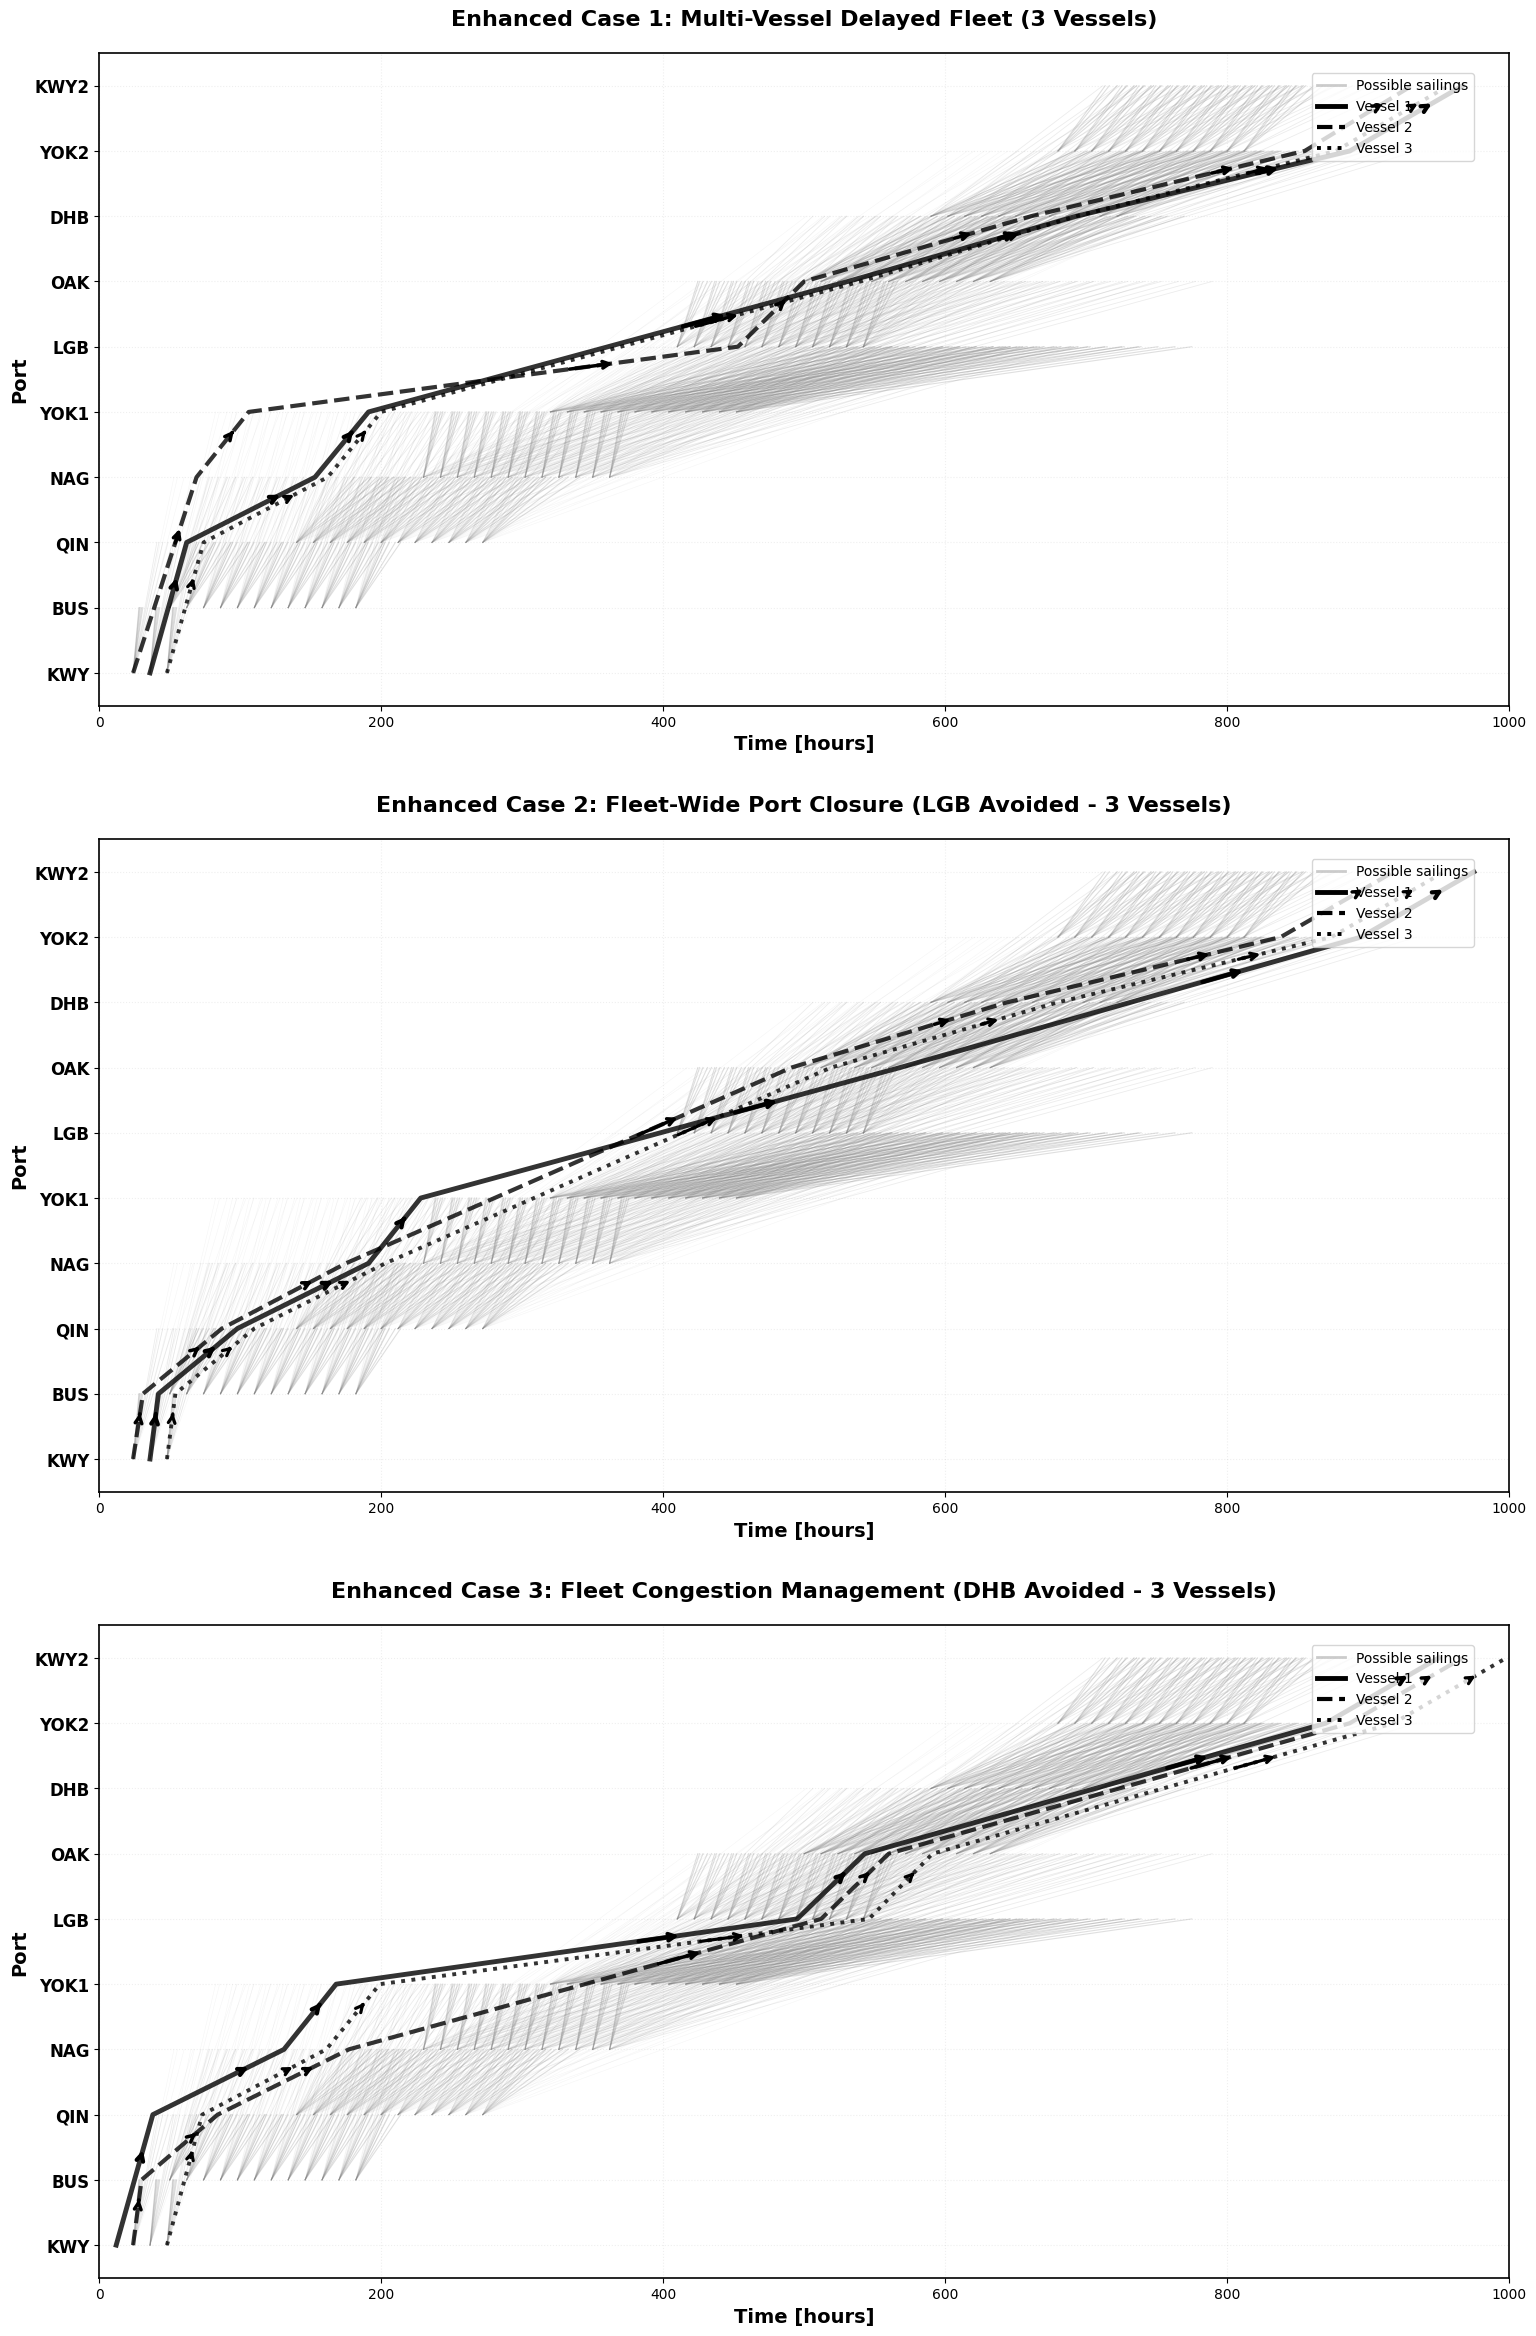

In [22]:
###Illustration of the Extended case routes###
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

def create_enhanced_time_space_plots():
    """
    Creates time-space network visualizations for the three enhanced multi-vessel cases
    """
    
    # Port data
    ports = ['KWY', 'BUS', 'QIN', 'NAG', 'YOK1', 'LGB', 'OAK', 'DHB', 'YOK2', 'KWY2']
    
    # Distance matrix for generating possible edges
    distances = {
        ('KWY', 'BUS'): 103, ('BUS', 'QIN'): 476, ('QIN', 'NAG'): 1029,
        ('NAG', 'YOK1'): 205, ('YOK1', 'LGB'): 4844, ('LGB', 'OAK'): 364,
        ('OAK', 'DHB'): 2062, ('DHB', 'YOK2'): 2550, ('YOK2', 'KWY2'): 837,
        ('KWY', 'QIN'): 421, ('BUS', 'NAG'): 699, ('QIN', 'YOK1'): 1143,
        ('NAG', 'LGB'): 4977, ('YOK1', 'OAK'): 5061, ('LGB', 'DHB'): 2404,
        ('OAK', 'YOK2'): 4536, ('DHB', 'KWY2'): 3044,
        ('KWY', 'NAG'): 724, ('BUS', 'YOK1'): 813, ('QIN', 'LGB'): 5748,
        ('NAG', 'OAK'): 4674, ('YOK1', 'DHB'): 4536, ('LGB', 'YOK2'): 4844,
        ('KWY', 'YOK1'): 837, ('BUS', 'LGB'): 5294, ('QIN', 'OAK'): 5431,
        ('NAG', 'DHB'): 2692, ('YOK1', 'YOK2'): 4536, ('LGB', 'KWY2'): 5377,
    }
    
    speed_values = {15: 15.0, 16: 16.0, 17: 17.0, 18: 18.0, 19: 19.0, 20: 20.0, 
                   21: 21.0, 22: 22.0, 23: 23.0, 24: 24.0, 25: 25.0}
    
    # Generate comprehensive possible edges for background
    def generate_comprehensive_edges():
        edges = []
        
        # Define actual departure times for the 3 vessels (based on their delays)
        vessel_start_times = [36, 24, 48]  # Actual initial delays for 3 vessels
        
        # Generate time grids - but KWY (port 0) only uses actual start times
        time_grids = {}
        for i, port in enumerate(ports):
            time_grids[port] = []
            
            if i == 0:  # KWY - only actual departure times
                time_grids[port] = vessel_start_times.copy()
            else:  # Other ports - multiple possible times for flexibility
                base_time = i * 90
                for time_offset in range(-40, 100, 12):  # Less dense
                    time_slot = max(0, base_time + time_offset)
                    if time_slot <= 1000:
                        time_grids[port].append(time_slot)
        
        # Generate all possible connections
        for i in range(len(ports)):
            for j in range(i+1, min(i+4, len(ports))):  # Up to 3 skips
                from_port = ports[i]
                to_port = ports[j]
                
                if (from_port, to_port) in distances:
                    distance = distances[(from_port, to_port)]
                    
                    for from_time in time_grids[from_port]:
                        for speed in [15, 17, 20, 23, 25]:  # Sample speeds
                            travel_time = distance / speed
                            to_time = from_time + travel_time
                            
                            if to_time <= 1000:
                                skip_count = j - i - 1
                                edges.append((i, j, from_time, to_time, skip_count))
        
        return edges
    
    all_edges = generate_comprehensive_edges()
    
    
    case_solutions = {
        'Enhanced Case 1: Multi-Vessel Delayed Fleet (3 Vessels)': [
            # Vessel 1: KWY→QIN→NAG→YOK1→OAK→DHB→YOK2→KWY2 (skip BUS, LGB)
            # Using SLOW_16, SLOW_18, SLOW_15, SLOW_16, SLOW_15, SLOW_15, SLOW_15
            [(0, 2, 36, 62), (2, 3, 86, 153), (3, 4, 177, 191), (4, 6, 215, 531), 
             (6, 7, 555, 693), (7, 8, 717, 887), (8, 9, 911, 967)],
            
            # Vessel 2: KWY→NAG→YOK1→LGB→OAK→DHB→YOK2→KWY2 (skip BUS, QIN)
            # Using SLOW_16, SLOW_16, SLOW_15, SLOW_16, SLOW_15, SLOW_15, SLOW_16
            [(0, 3, 24, 69), (3, 4, 93, 106), (4, 5, 130, 453), (5, 6, 477, 500), 
             (6, 7, 524, 661), (7, 8, 685, 855), (8, 9, 879, 931)],
            
            # Vessel 3: KWY→QIN→NAG→YOK1→OAK→DHB→YOK2→KWY2 (skip BUS, LGB)
            # Using SLOW_16, SLOW_16, SLOW_15, SLOW_16, SLOW_16, SLOW_16, SLOW_15
            [(0, 2, 48, 74), (2, 3, 98, 162), (3, 4, 186, 200), (4, 6, 224, 540), 
             (6, 7, 564, 693), (7, 8, 717, 877), (8, 9, 901, 957)]
        ],
        
        'Enhanced Case 2: Fleet-Wide Port Closure (LGB Avoided - 3 Vessels)': [
            # All vessels avoid LGB ($360,000 penalty)
            # Vessel 1: KWY→BUS→QIN→NAG→YOK1→OAK→YOK2→KWY2 (skip LGB, DHB)
            # Using SLOW_17, SLOW_15, SLOW_15, SLOW_16, SLOW_16, SLOW_15, SLOW_15
            [(0, 1, 36, 42), (1, 2, 66, 98), (2, 3, 122, 191), (3, 4, 215, 228), 
             (4, 6, 252, 568), (6, 8, 592, 895), (8, 9, 919, 975)],
            
            # Vessel 2: KWY→BUS→QIN→NAG→OAK→DHB→YOK2→KWY2 (skip YOK1, LGB)
            # Using SLOW_15, SLOW_15, SLOW_16, SLOW_16, SLOW_16, SLOW_15, SLOW_15
            [(0, 1, 24, 31), (1, 2, 55, 87), (2, 3, 111, 175), (3, 6, 199, 491), 
             (6, 7, 515, 644), (7, 8, 668, 838), (8, 9, 862, 918)],
            
            # Vessel 3: KWY→BUS→QIN→NAG→OAK→DHB→YOK2→KWY2 (skip YOK1, LGB)
            # Using SLOW_17, SLOW_15, SLOW_15, SLOW_16, SLOW_15, SLOW_15, SLOW_15
            [(0, 1, 48, 54), (1, 2, 78, 110), (2, 3, 134, 203), (3, 6, 227, 519), 
             (6, 7, 543, 680), (7, 8, 704, 874), (8, 9, 898, 954)]
        ],
        
        'Enhanced Case 3: Fleet Congestion Management (DHB Avoided - 3 Vessels)': [
            # All vessels avoid DHB ($240,000 penalty)
            # Vessel 1: KWY→QIN→NAG→YOK1→LGB→OAK→YOK2→KWY2 (skip BUS, DHB)
            # Using SLOW_16, SLOW_15, SLOW_16, SLOW_16, SLOW_15, SLOW_15, SLOW_15
            [(0, 2, 12, 38), (2, 3, 62, 131), (3, 4, 155, 168), (4, 5, 192, 495), 
             (5, 6, 519, 543), (6, 8, 567, 870), (8, 9, 894, 950)],
            
            # Vessel 2: KWY→BUS→QIN→NAG→LGB→OAK→YOK2→KWY2 (skip YOK1, DHB)
            # Using SLOW_16, SLOW_16, SLOW_15, SLOW_16, SLOW_15, SLOW_15, SLOW_15
            [(0, 1, 24, 30), (1, 2, 54, 84), (2, 3, 108, 177), (3, 5, 201, 512), 
             (5, 6, 536, 560), (6, 8, 584, 887), (8, 9, 911, 967)],
            
            # Vessel 3: KWY→QIN→NAG→YOK1→LGB→OAK→YOK2→KWY2 (skip BUS, DHB)
            # Using SLOW_17, SLOW_16, SLOW_15, SLOW_15, SLOW_17, SLOW_15, SLOW_15
            [(0, 2, 48, 73), (2, 3, 97, 161), (3, 4, 185, 199), (4, 5, 223, 546), 
             (5, 6, 570, 591), (6, 8, 615, 918), (8, 9, 942, 998)]
        ]
    }
    
    case_titles = [
        'Enhanced Case 1: Multi-Vessel Delayed Fleet (3 Vessels)',
        'Enhanced Case 2: Fleet-Wide Port Closure (LGB Avoided - 3 Vessels)', 
        'Enhanced Case 3: Fleet Congestion Management (DHB Avoided - 3 Vessels)'
    ]
    
    # Create three separate plots
    fig, axes = plt.subplots(3, 1, figsize=(16, 24))
    
    for idx, (title, solutions) in enumerate(zip(case_titles, case_solutions.values())):
        ax = axes[idx]
        
        # Set up the plot
        ax.set_xlabel('Time [hours]', fontsize=14, fontweight='bold')
        ax.set_ylabel('Port', fontsize=14, fontweight='bold')
        ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
        
        # Port positions
        port_positions = {port: i for i, port in enumerate(ports)}
        ax.set_yticks(range(len(ports)))
        ax.set_yticklabels(ports, fontsize=12, fontweight='bold')
        ax.set_ylim(-0.5, len(ports) - 0.5)
        ax.set_xlim(0, 1000)
        
        # Plot all possible edges in gray
        for edge in all_edges:
            from_y, to_y, from_time, to_time, skip_count = edge
            
            if skip_count == 0:  # Consecutive ports
                alpha = 0.25
                linewidth = 0.8
            elif skip_count == 1:  # Skip 1 port
                alpha = 0.15
                linewidth = 0.6
            else:  # Skip 2+ ports
                alpha = 0.08
                linewidth = 0.4
            
            ax.plot([from_time, to_time], [from_y, to_y],
                   color='gray', alpha=alpha, linewidth=linewidth, zorder=1)
        
        # Plot optimal solutions for all 3 vessels
        vessel_colors = ['black', 'black', 'black']
        vessel_styles = ['-', '--', ':']  # Different line styles for 3 vessels
        vessel_widths = [3.5, 3.0, 2.8]
        
        for vessel_idx, vessel_path in enumerate(solutions):
            color = vessel_colors[vessel_idx]
            style = vessel_styles[vessel_idx]
            width = vessel_widths[vessel_idx]
            
            # Extract path coordinates
            path_times = []
            path_ports = []
            
            for segment in vessel_path:
                from_idx, to_idx, from_time, to_time = segment
                
                if len(path_times) == 0:  # First segment
                    path_times.append(from_time)
                    path_ports.append(from_idx)
                
                path_times.append(to_time)
                path_ports.append(to_idx)
            
            # Draw the continuous path
            if len(path_times) > 1:
                ax.plot(path_times, path_ports,
                       color=color, linewidth=width, linestyle=style,
                       zorder=5, alpha=0.8)
                
                # Add arrows along the path
                for i in range(len(path_times) - 1):
                    # Position arrow at 70% of each segment
                    arrow_pos = 0.7
                    arrow_x = path_times[i] + (path_times[i+1] - path_times[i]) * arrow_pos
                    arrow_y = path_ports[i] + (path_ports[i+1] - path_ports[i]) * arrow_pos
                    
                    # Calculate arrow direction
                    dx = path_times[i+1] - path_times[i]
                    dy = path_ports[i+1] - path_ports[i]
                    
                    if dx != 0 or dy != 0:  # Avoid zero-length arrows
                        arrow = FancyArrowPatch(
                            (arrow_x - dx*0.05, arrow_y - dy*0.05),
                            (arrow_x + dx*0.05, arrow_y + dy*0.05),
                            arrowstyle='->', mutation_scale=12,
                            color=color, linewidth=width-0.5, zorder=6
                        )
                        ax.add_patch(arrow)
        
        # Create legend for this subplot
        legend_elements = [
            plt.Line2D([0], [0], color='gray', alpha=0.4, linewidth=2, 
                       label='Possible sailings'),
            plt.Line2D([0], [0], color='black', linewidth=3.5, linestyle='-', 
                       label='Vessel 1'),
            plt.Line2D([0], [0], color='black', linewidth=3.0, linestyle='--', 
                       label='Vessel 2'),
            plt.Line2D([0], [0], color='black', linewidth=2.8, linestyle=':', 
                       label='Vessel 3'),
        ]
        
        ax.legend(handles=legend_elements, loc='upper right', 
                 bbox_to_anchor=(0.98, 0.98), fontsize=10, frameon=True)
        
        # Add grid
        ax.grid(True, alpha=0.2, linestyle=':', zorder=0)
        
        # Complete border
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.2)
    
    plt.tight_layout(pad=3.0)
    plt.show()

# Run the enhanced visualization
create_enhanced_time_space_plots()

## Conclusion

Uncertain disruptions are endemic to liner shipping services, requiring shipping companies to develop rational and cost-effective recovery strategies. This project implemented and analyzed a comprehensive mathematical model for the Vessel Schedule Recovery Problem (VSRP), minimizing a weighted total cost that balances operational costs against service disruption penalties.

### Model Capabilities

The implemented model makes simultaneous decisions on four key recovery strategies:
- Adjusting sailing speed
- Adjusting port handling time
- Port skipping
- Port swapping

Extensive numerical studies on a trans-Pacific liner shipping route demonstrated effective handling of various disruption scenarios at both single-vessel and multi-vessel fleet scales.

### Primary Contributions

**1. Integrated Strategy Framework**  
Unlike previous VSRP literature that applied strategies in isolation, our framework simultaneously considers speed adjustments, port operations, and network modifications, providing a holistic approach to schedule recovery.

**2. Trade-off Analysis Architecture**  
The adjustable parameter α offers a clear framework for analyzing the critical trade-off between operational cost and service quality.

### Management Implications

**1. Combined Strategy Effectiveness**  
For significant disruptions, the most effective recovery plan often combines multiple strategies. Port skipping creates necessary time buffers to implement profitable, fuel-saving slow steaming across the fleet.

**2. Economic Reality of Delays**  
Across multi-vessel scenarios, delays are common, reflecting the economic superiority of accepting limited service penalties over incurring exponential fuel costs or prohibitive port-specific operation costs.

**3. Quantitative Trade-off Management**  
Sensitivity analysis on α revealed a distinct threshold where optimal strategy pivots from cost-focus to service-focus, allowing managers to align recovery actions with business objectives.

### Limitations and Future Research

**Current Limitations:**
- Framework remains route-specific without network-wide optimization across multiple services
- Fixed cost parameters do not capture dynamic market conditions
- Environmental impact assessment not incorporated

**Future Research Directions:**
- Incorporate state-dependent costs reflecting real-time market conditions
- Extend to network-wide optimization across multiple shipping services
- Add carbon emissions costs and regulatory constraints for green shipping compliance

